## Problem Statement:
To predict the price of Property using Regression Analysis

In [2]:
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.model_selection import train_test_split # for data splitting
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm # OLS

In [3]:
from scipy.stats import ttest_ind

### Creating function to compute MAE, MSE, RMSE, R2 Score

In [4]:
def eval_model(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest, ypred)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2_Score:', r2s)

### Read the dataset

In [5]:
df = pd.read_csv('HousePrices.csv')
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Shape

In [6]:
df.shape 
# rows=2073, cols = 81

(2073, 81)

## Data Preprocessing
<pre>
1. handling null values
2. handling suplicates
3. handling outliers
4. handling datatype of columns
5. correlation
</pre>

### 1. Handling Null values

In [7]:
nv = df.isnull().sum()
nv = nv[nv>0]
print(type(nv))
nv

<class 'pandas.core.series.Series'>


LotFrontage      320
Alley           1944
MasVnrType        14
MasVnrArea        14
BsmtQual          59
BsmtCond          59
BsmtExposure      61
BsmtFinType1      59
BsmtFinType2      60
Electrical         1
FireplaceQu      988
GarageType       113
GarageYrBlt      113
GarageFinish     113
GarageQual       113
GarageCond       113
PoolQC          2065
Fence           1669
MiscFeature     1993
dtype: int64

In [8]:
nv_per = (nv/df.shape[0])*100
print(nv_per)

LotFrontage     15.436565
Alley           93.777135
MasVnrType       0.675350
MasVnrArea       0.675350
BsmtQual         2.846117
BsmtCond         2.846117
BsmtExposure     2.942595
BsmtFinType1     2.846117
BsmtFinType2     2.894356
Electrical       0.048239
FireplaceQu     47.660396
GarageType       5.451037
GarageYrBlt      5.451037
GarageFinish     5.451037
GarageQual       5.451037
GarageCond       5.451037
PoolQC          99.614086
Fence           80.511336
MiscFeature     96.140859
dtype: float64


In [9]:
print(nv_per.values)

[1.54365654e+01 9.37771346e+01 6.75349735e-01 6.75349735e-01
 2.84611674e+00 2.84611674e+00 2.94259527e+00 2.84611674e+00
 2.89435601e+00 4.82392668e-02 4.76603956e+01 5.45103714e+00
 5.45103714e+00 5.45103714e+00 5.45103714e+00 5.45103714e+00
 9.96140859e+01 8.05113362e+01 9.61408587e+01]


In [10]:
nv_df = pd.DataFrame({'Col': nv.index, 'Sum-Null': nv.values, 'Per_Null':nv_per.values})
nv_df.sort_values(by='Sum-Null', ascending = False)

,Col,Sum-Null,Per_Null
16,PoolQC,2065,99.614086
18,MiscFeature,1993,96.140859
1,Alley,1944,93.777135
17,Fence,1669,80.511336
10,FireplaceQu,988,47.660396
0,LotFrontage,320,15.436565
11,GarageType,113,5.451037
12,GarageYrBlt,113,5.451037
13,GarageFinish,113,5.451037
14,GarageQual,113,5.451037


In [11]:
df1 = df.copy()

In [12]:
df1['PoolQC'].value_counts()
# df1['PoolQC'].fillna('None', inplace=True)

Gd    4
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [13]:
df1['MiscFeature'].value_counts()
# df1['MiscFeature'].fillna('None', inplace=True)

Shed    74
Othr     3
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [14]:
df1['Alley'].value_counts()
# df1['Alley'].fillna('None', inplace=True)

Grvl    72
Pave    57
Name: Alley, dtype: int64

#### Feature significance using T-Test
it is an old method we'll use OLS for Feature Selection

In [15]:
from scipy.stats import ttest_ind

In [16]:
a1 = df1['Property_Sale_Price'][df1['Alley']=='Grvl']
a2 = df1['Property_Sale_Price'][df1['Alley']=='Pave']
print(len(a1), len(a2))

72 57


In [17]:
# h0 = mean of a1 = mean of a2 => there is NO statistical diff bw mean a1 and mean a2
# h1 = mean of a1 != mean of a2 => there is statistical diff bw mean a1 and mean a2
t_stat , p = ttest_ind(a1, a2)
print(t_stat, p)
if p>0.05:
    print('Accept h0')
else: 
    print('Reject h0 => Accept h1')
# statistically it means that there is significance of the column and the column should be retained

-8.795678962194243 8.622117012118536e-15
Reject h0 => Accept h1


In [18]:
# currently we are interested in dropping the columns

In [19]:
df1.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace=True)

In [20]:
nv = df1.isnull().sum()
nv[nv>0]

LotFrontage     320
MasVnrType       14
MasVnrArea       14
BsmtQual         59
BsmtCond         59
BsmtExposure     61
BsmtFinType1     59
BsmtFinType2     60
Electrical        1
GarageType      113
GarageYrBlt     113
GarageFinish    113
GarageQual      113
GarageCond      113
dtype: int64

#### Basement based columns

In [21]:
# BsmtQual         59
# BsmtCond         59
# BsmtExposure     61
# BsmtFinType1     59
# BsmtFinType2     60

In [22]:
df1['BsmtQual'].value_counts()

Gd    904
TA    891
Ex    169
Fa     50
Name: BsmtQual, dtype: int64

In [23]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df1[i] = df1[i].fillna('None')

#### Garage based columns

In [24]:
# GarageType      113
# GarageYrBlt     113
# GarageFinish    113
# GarageQual      113
# GarageCond      113

In [25]:
df1['GarageYrBlt'].value_counts()

2005.0    116
2006.0     82
2007.0     81
2003.0     72
2004.0     66
         ... 
1908.0      1
1906.0      1
2013.0      1
2019.0      1
2015.0      1
Name: GarageYrBlt, Length: 102, dtype: int64

In [26]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df1[i] = df1[i].fillna('None')

In [27]:
df1['GarageYrBlt'].mode()[0]

2005.0

In [28]:
df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].mode()[0], inplace=True)

In [29]:
nv = df1.isnull().sum()
nv[nv>0]

LotFrontage    320
MasVnrType      14
MasVnrArea      14
Electrical       1
dtype: int64

In [30]:
df1['MasVnrType'].value_counts()

None       1233
BrkFace     620
Stone       186
BrkCmn       20
Name: MasVnrType, dtype: int64

In [31]:
df1['LotFrontage'].value_counts()

60.0     181
70.0      91
80.0      89
75.0      73
50.0      72
        ... 
111.0      1
141.0      1
140.0      1
150.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [32]:
df1['LotFrontage'].fillna(df1['LotFrontage'].mean(), inplace=True)

In [33]:
df1['MasVnrArea'].fillna(df1['MasVnrArea'].median(), inplace=True)

In [34]:
df1['MasVnrType'].fillna('None', inplace=True)

In [35]:
df1.dropna(inplace=True)

In [36]:
df1.shape

(2072, 76)

### 2. Handling Duplicate values

In [37]:
df1.duplicated().sum()

13

In [38]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

### 3. Normality

In [39]:
import seaborn as sns

/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


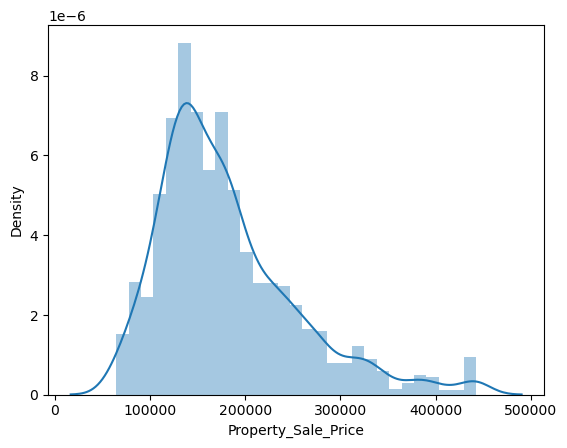

In [116]:
sns.distplot(df1['Property_Sale_Price'])
plt.show()

In [41]:
from scipy.stats import shapiro
# used to check normality
# H0 = data is normally distributed
# H1 = data is normally distributed

In [42]:
shap_stat, p = shapiro(df1['Property_Sale_Price'])
print(shap_stat, p)

0.8745330572128296 7.553234701372156e-38


In [43]:
# if data is not normally distributed
# 1. log transformation
# 2. sqr, sqrt, cube
# 3. box-cox trans

In [44]:
shap_stat, p = shapiro(np.log(df1['Property_Sale_Price']))
print(shap_stat, p)

0.990365743637085 1.80199299926187e-10


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


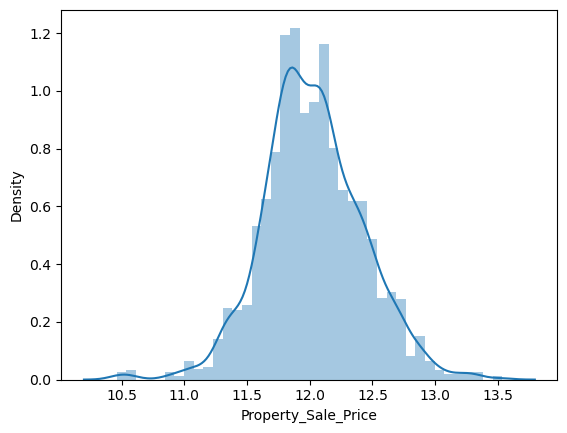

In [45]:
sns.distplot(np.log(df1['Property_Sale_Price']))
plt.show()

### 4. EDA
univariate - countplot, boxplot, histogram, kdeplot<br>
bivariate - 

#### Univariate

In [46]:
df.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [47]:
df1.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wood

In [48]:
df1.dtypes.value_counts()

object     38
int64      35
float64     3
dtype: int64

#### Extract numerical and categorical columns

In [49]:
num_cols = df1.dtypes[df1.dtypes!='object'].index
cat_cols = df1.dtypes[df1.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')
Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
  

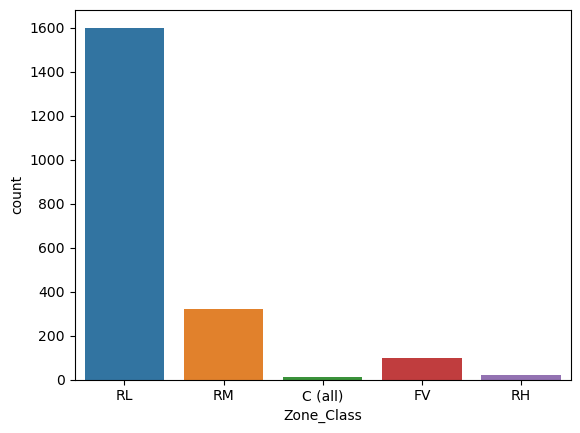

RL         1601
RM          323
FV          100
RH           21
C (all)      14
Name: Zone_Class, dtype: int64

In [50]:
sns.countplot(x=df1['Zone_Class'])
plt.show()
df1['Zone_Class'].value_counts()

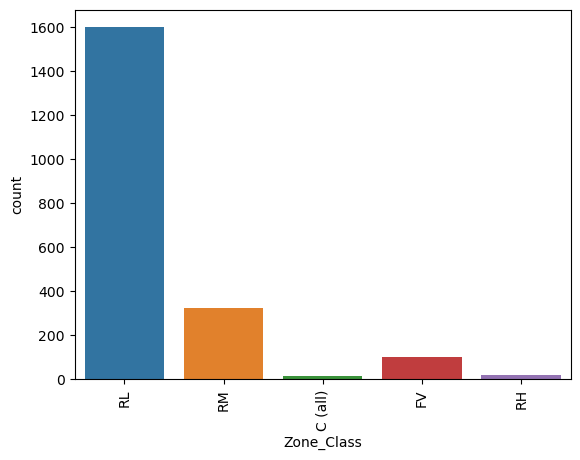

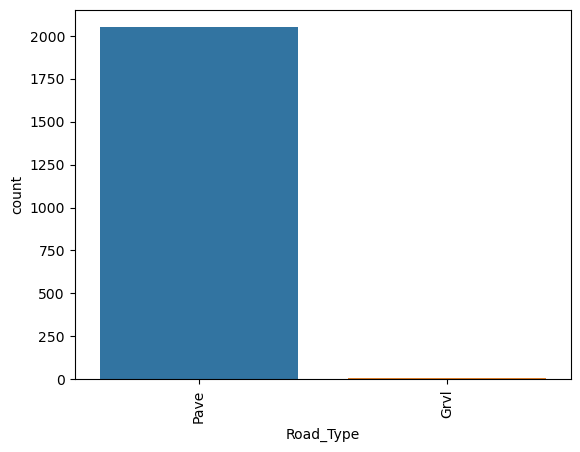

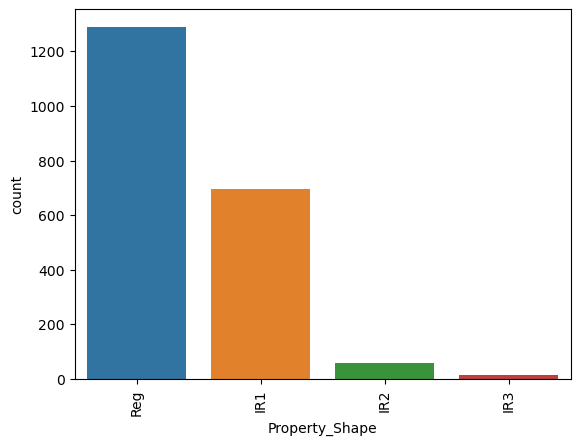

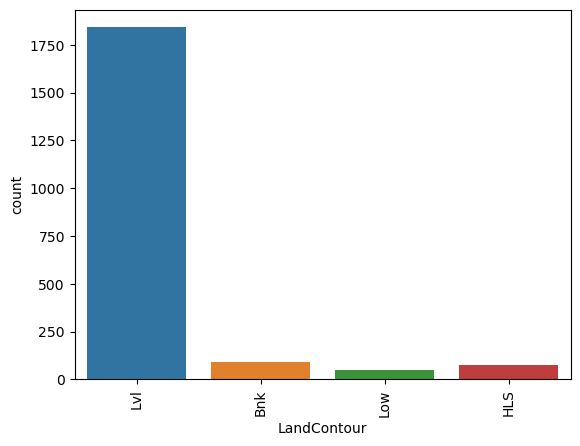

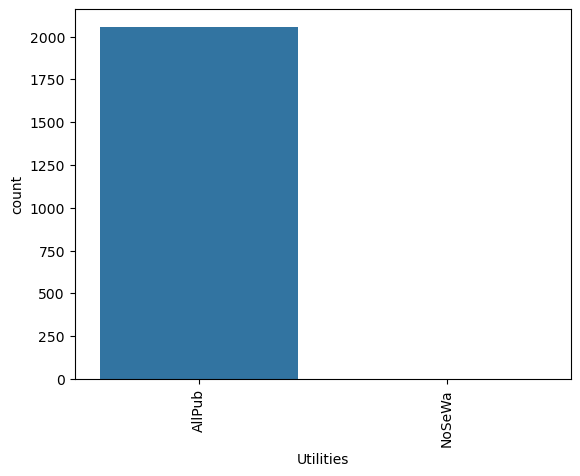

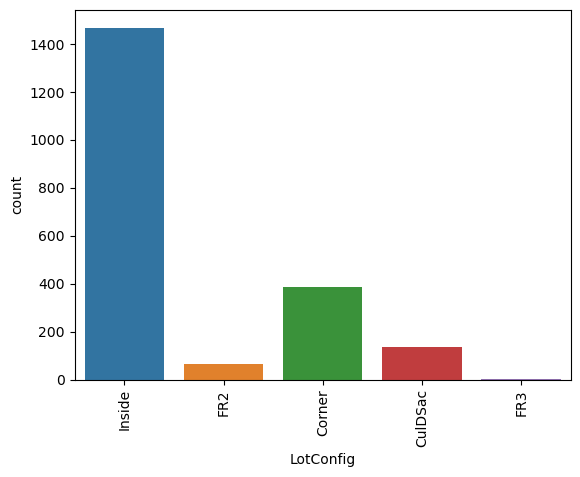

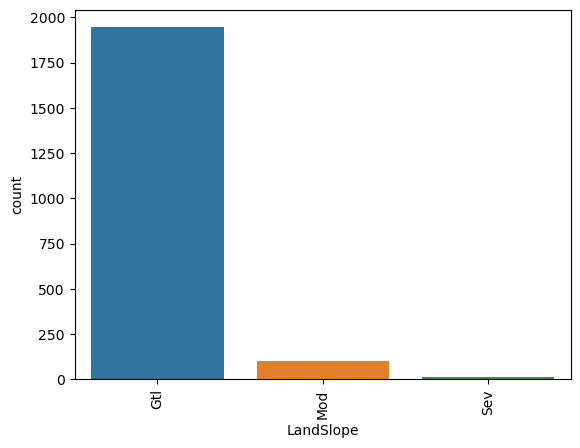

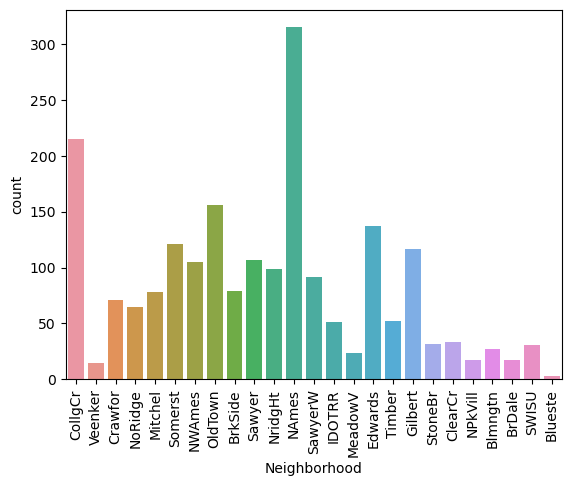

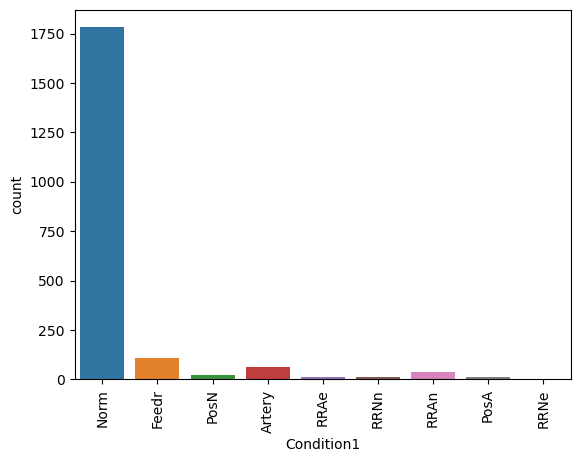

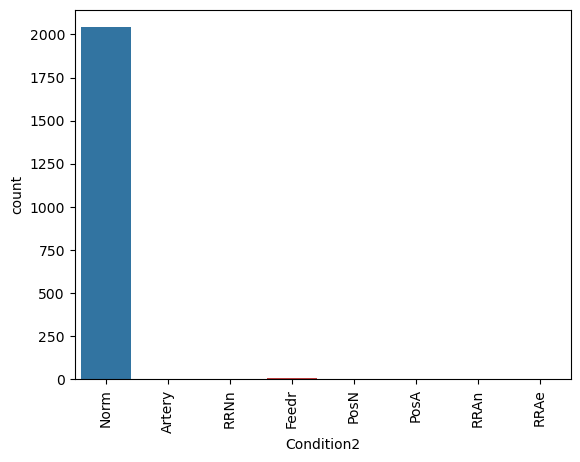

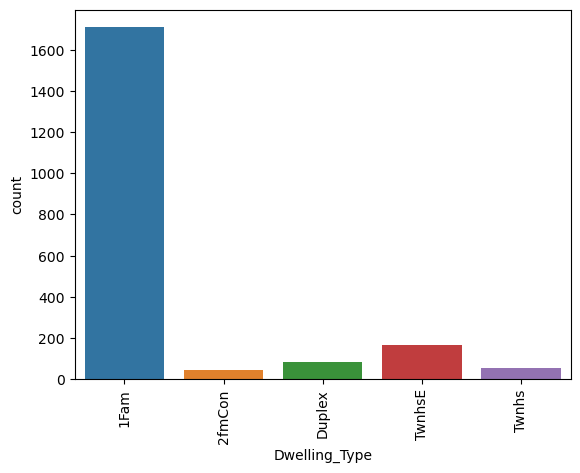

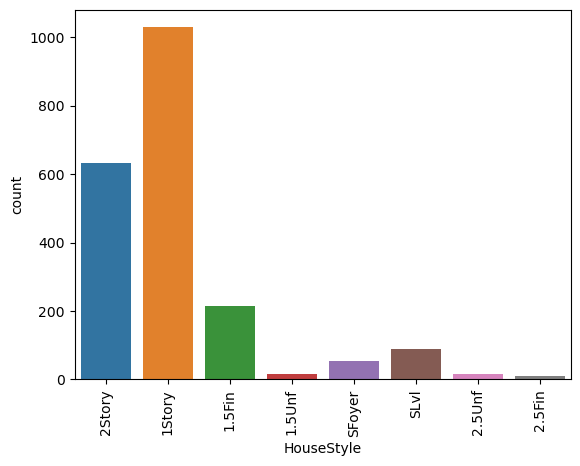

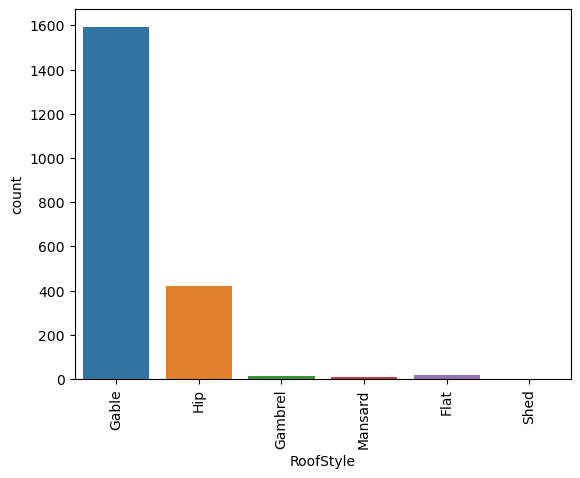

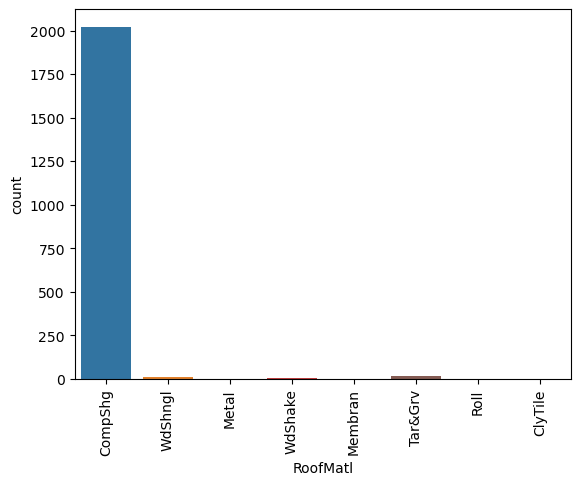

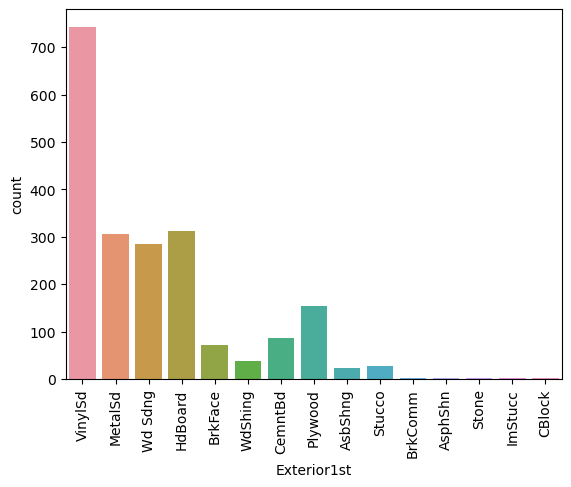

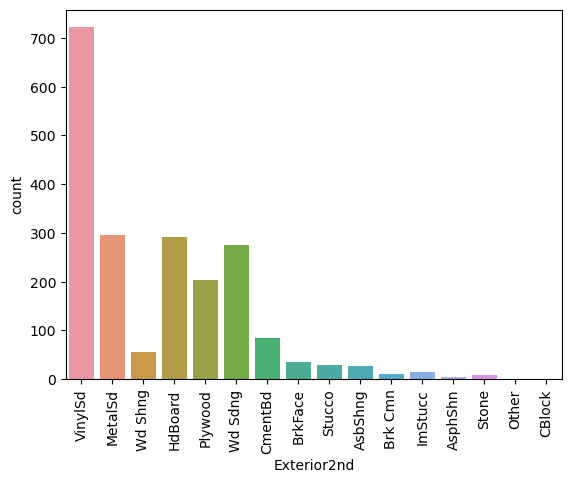

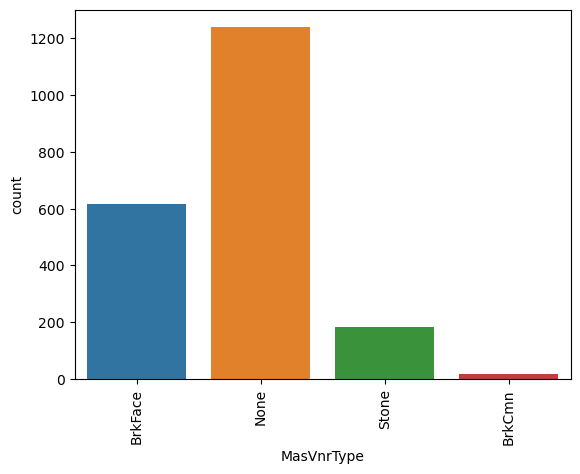

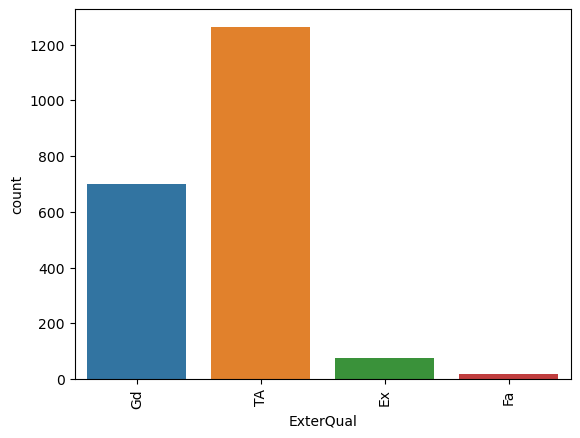

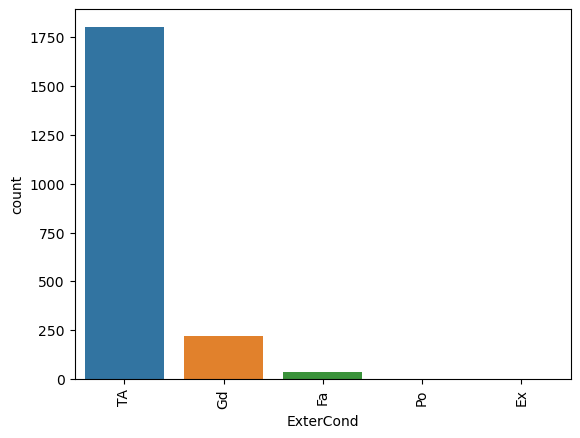

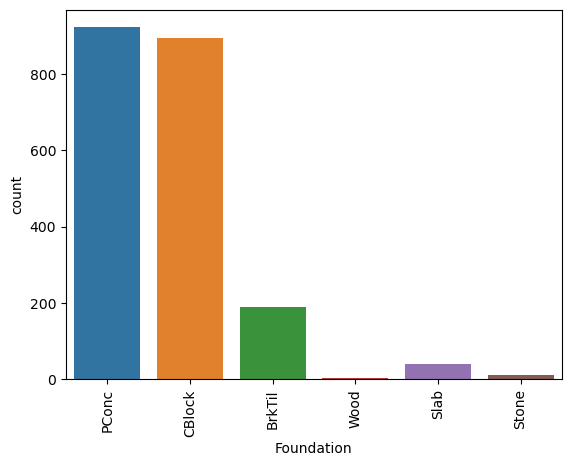

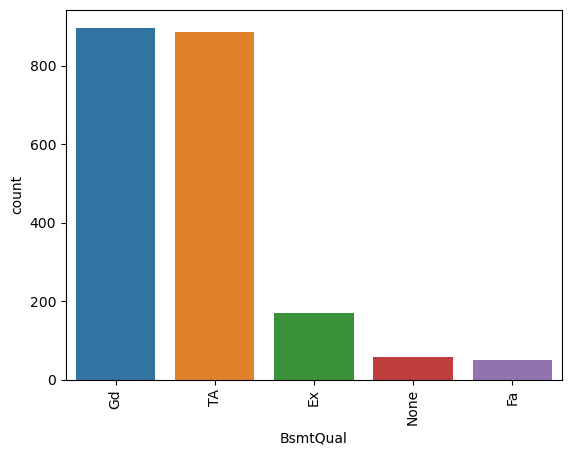

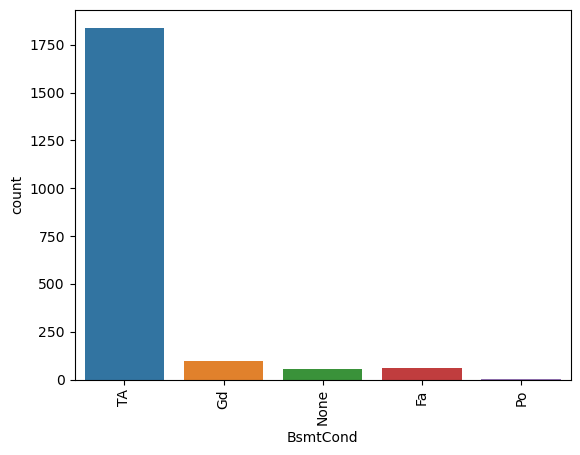

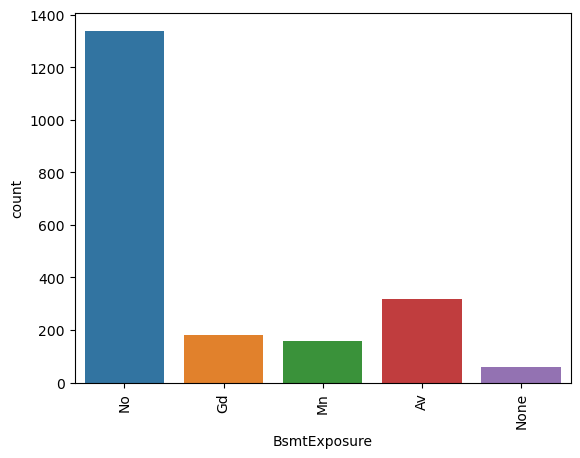

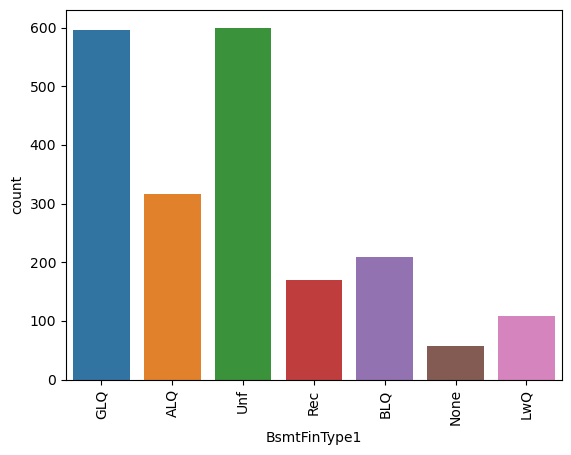

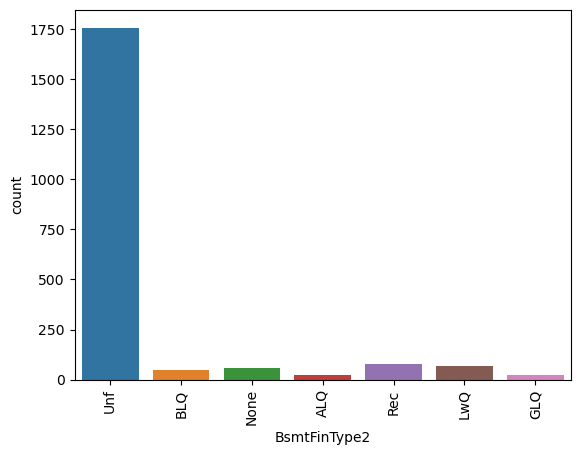

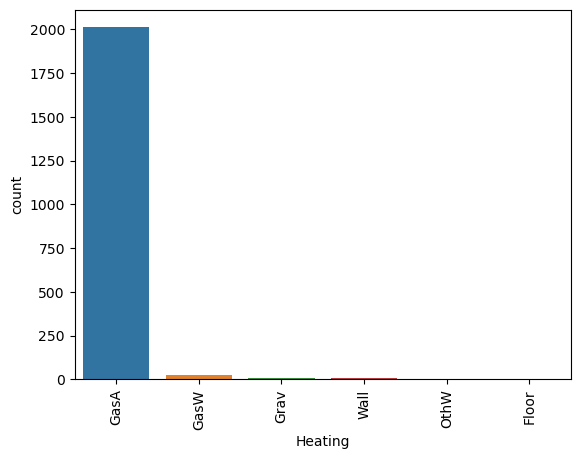

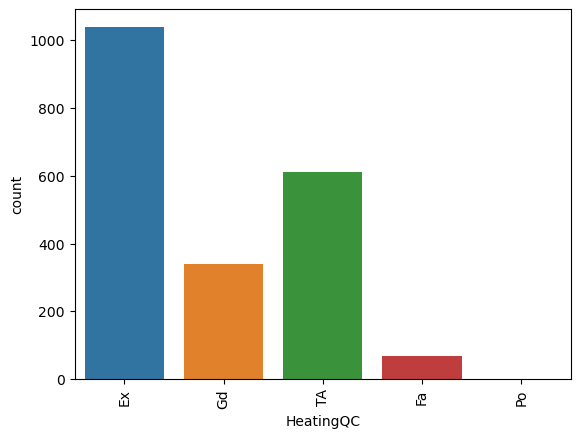

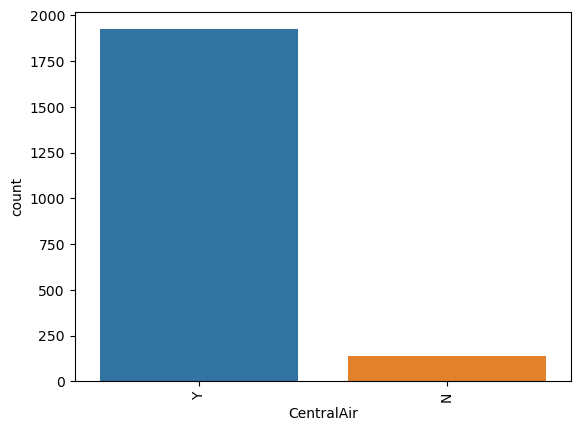

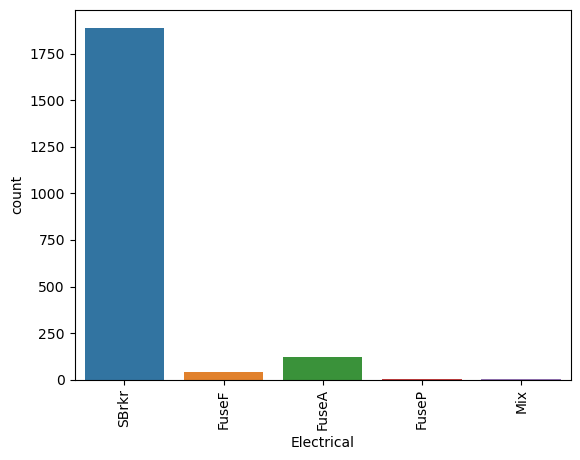

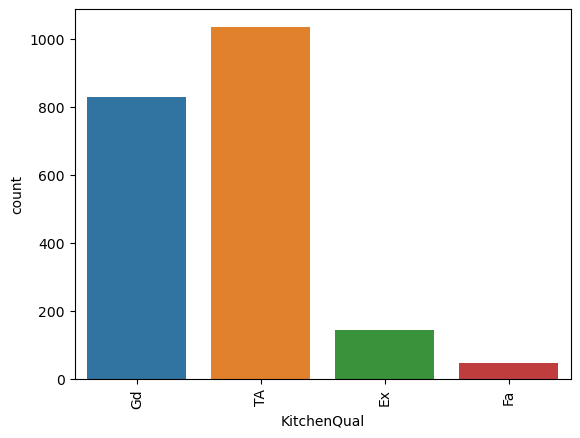

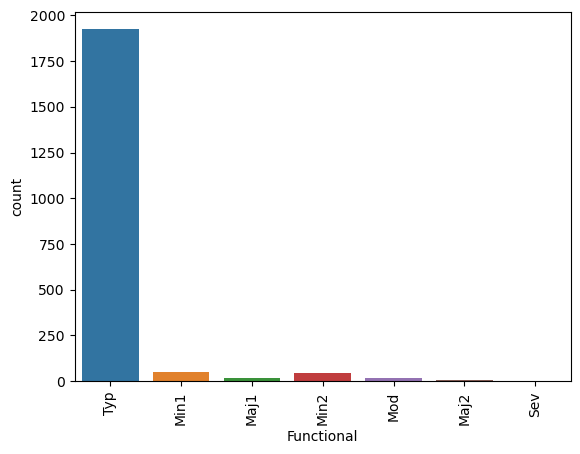

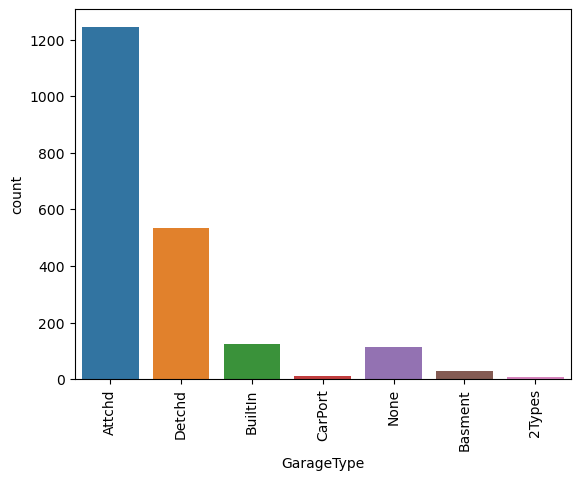

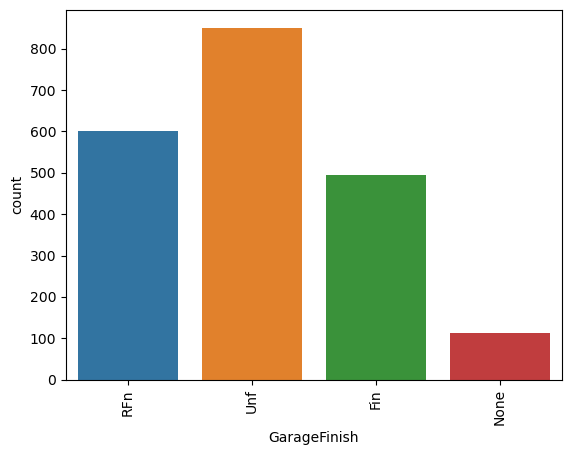

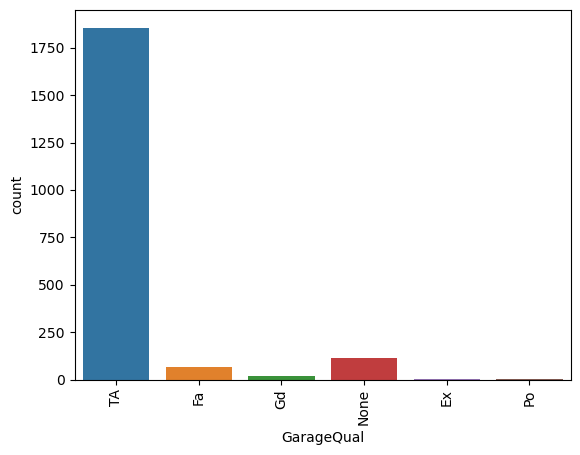

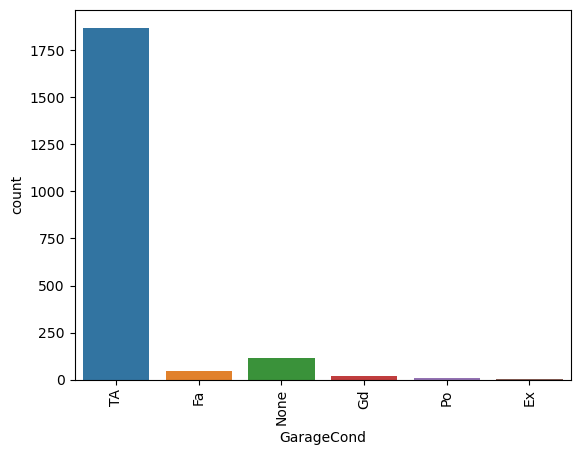

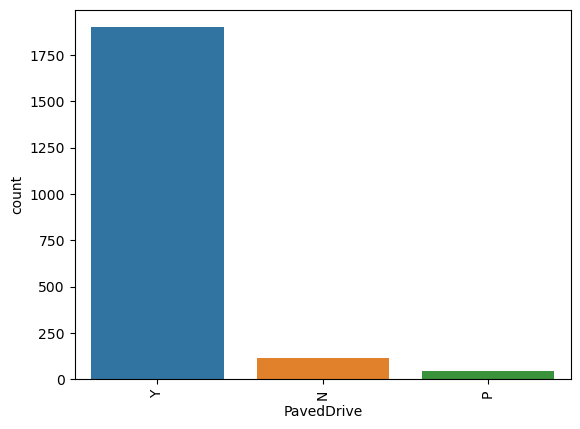

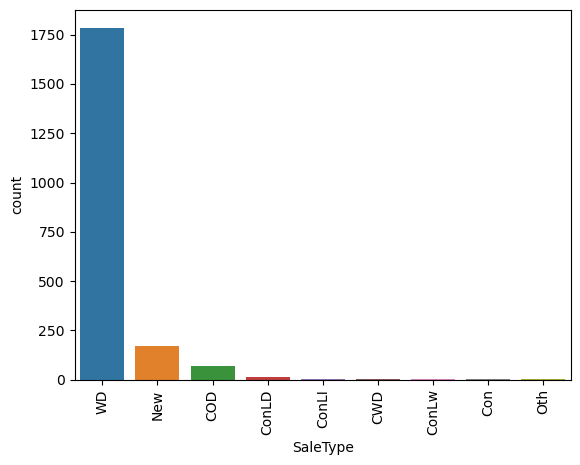

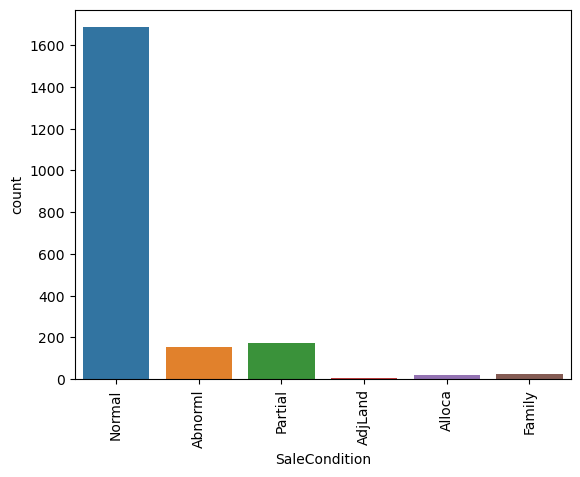

In [51]:
for i in cat_cols:
    sns.countplot(x=df1[i])
    plt.xticks(rotation=90)
    plt.show()

#### Bivariate Analysis

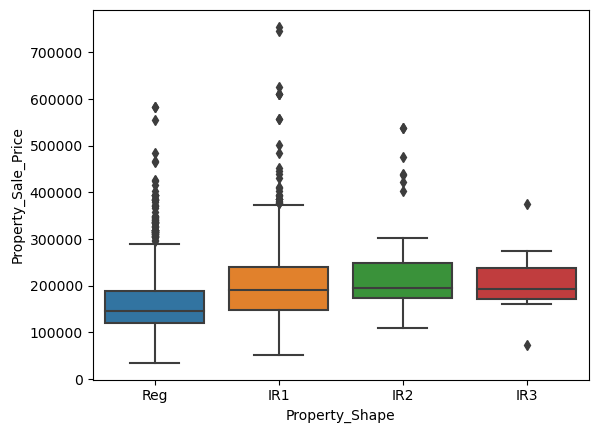

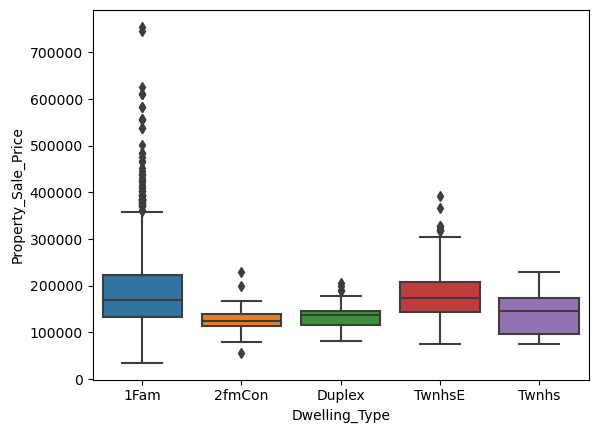

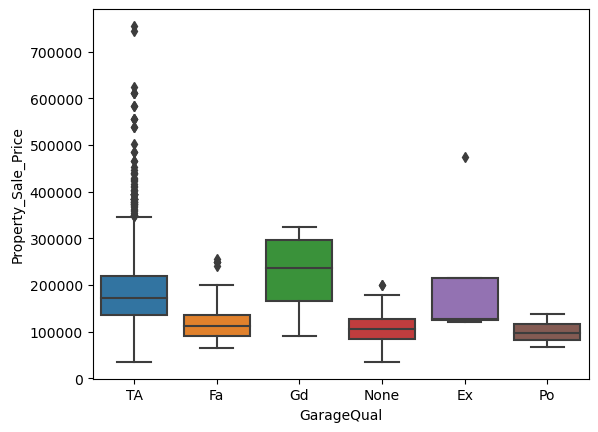

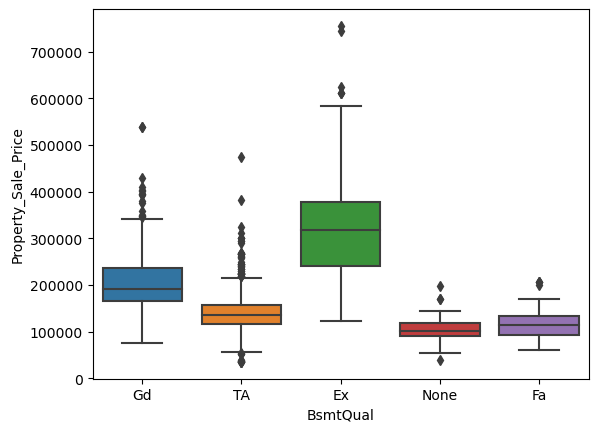

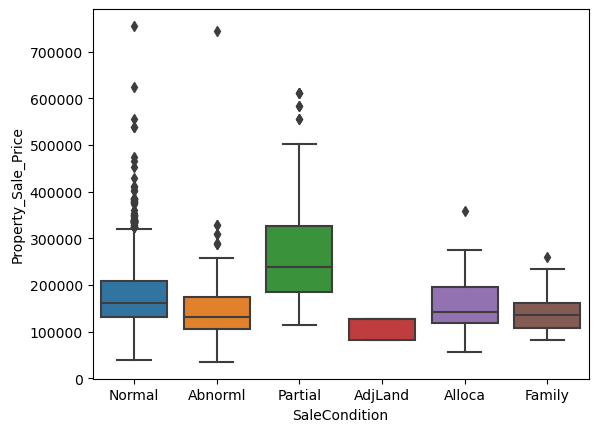

In [52]:
bp_cols = ['Property_Shape','Dwelling_Type','GarageQual', 'BsmtQual', 'SaleCondition']
for i in bp_cols:
    sns.boxplot(x = df1[i], y=df1['Property_Sale_Price'])
    plt.show()

#### Scatter Charts

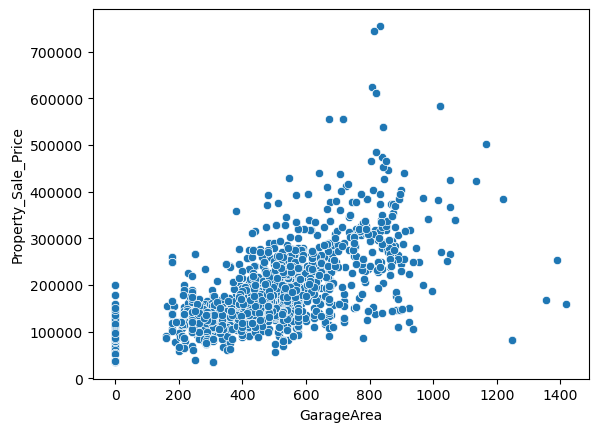

In [53]:
sns.scatterplot(x = df1['GarageArea'], y = df1['Property_Sale_Price'])
plt.show()
# positive correlation

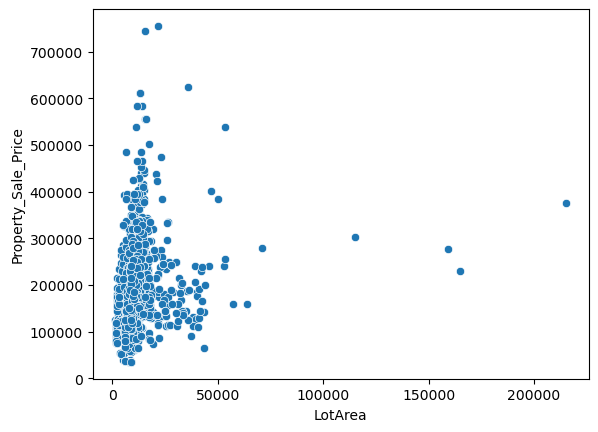

In [54]:
sns.scatterplot(x = df1['LotArea'], y = df1['Property_Sale_Price'])
plt.show()
# no correlation

#### Correlation

In [55]:
corr = df1.corr()
corr

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Id,1.000000,0.043254,0.062848,0.004289,0.083799,0.196274,-0.081205,0.087178,-0.027281,-0.016041,...,0.006033,-0.004690,0.001551,-0.045396,-0.004540,0.031345,-0.007268,0.000371,0.043628,-0.002485
Dwell_Type,0.043254,1.000000,-0.075158,-0.033404,0.046200,0.033448,0.026796,0.042466,-0.005020,-0.033675,...,0.004785,0.001118,-0.006064,-0.011979,-0.011855,0.001621,-0.003819,-0.020453,0.018573,-0.017628
LotFrontage,0.062848,-0.075158,1.000000,0.240162,0.102049,-0.009860,0.088728,0.095261,0.122148,0.131504,...,0.073960,0.100677,-0.001735,0.037777,0.020818,0.112234,-0.001544,0.023909,0.021811,0.269219
LotArea,0.004289,-0.033404,0.240162,1.000000,0.078274,0.013901,-0.009875,0.018034,0.061571,0.164451,...,0.120963,0.065434,-0.023213,0.010438,0.035573,0.062406,0.031195,-0.000840,-0.007585,0.211352
OverallQual,0.083799,0.046200,0.102049,0.078274,1.000000,-0.009881,0.335489,0.377899,0.280009,0.164363,...,0.154094,0.215462,-0.079899,0.000086,0.021618,0.045027,-0.034026,0.032446,-0.018544,0.522697
OverallCond,0.196274,0.033448,-0.009860,0.013901,-0.009881,1.000000,-0.243734,0.086265,-0.082133,-0.037304,...,0.012667,-0.041578,0.044106,0.017193,0.010680,-0.017117,0.041151,-0.027034,0.036009,-0.049782
YearBuilt,-0.081205,0.026796,0.088728,-0.009875,0.335489,-0.243734,1.000000,0.534109,0.264714,0.211506,...,0.181533,0.178454,-0.321128,0.034389,-0.047214,0.005934,-0.037532,0.027053,-0.005611,0.438186
YearRemodAdd,0.087178,0.042466,0.095261,0.018034,0.377899,0.086265,0.534109,1.000000,0.164294,0.104409,...,0.181864,0.218874,-0.175822,0.039945,-0.035578,-0.009758,-0.010713,0.031460,0.061345,0.475242
MasVnrArea,-0.027281,-0.005020,0.122148,0.061571,0.280009,-0.082133,0.264714,0.164294,1.000000,0.234505,...,0.124199,0.137640,-0.097543,0.029961,0.064726,0.003037,-0.034828,-0.018749,0.017957,0.478392
BsmtFinSF1,-0.016041,-0.033675,0.131504,0.164451,0.164363,-0.037304,0.211506,0.104409,0.234505,1.000000,...,0.207176,0.108239,-0.090215,0.044969,0.046341,0.099575,-0.001775,-0.018538,0.030316,0.374184


In [56]:
df1.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wood

In [57]:
df1.drop('Id',inplace=True, axis = 1)
df1.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF

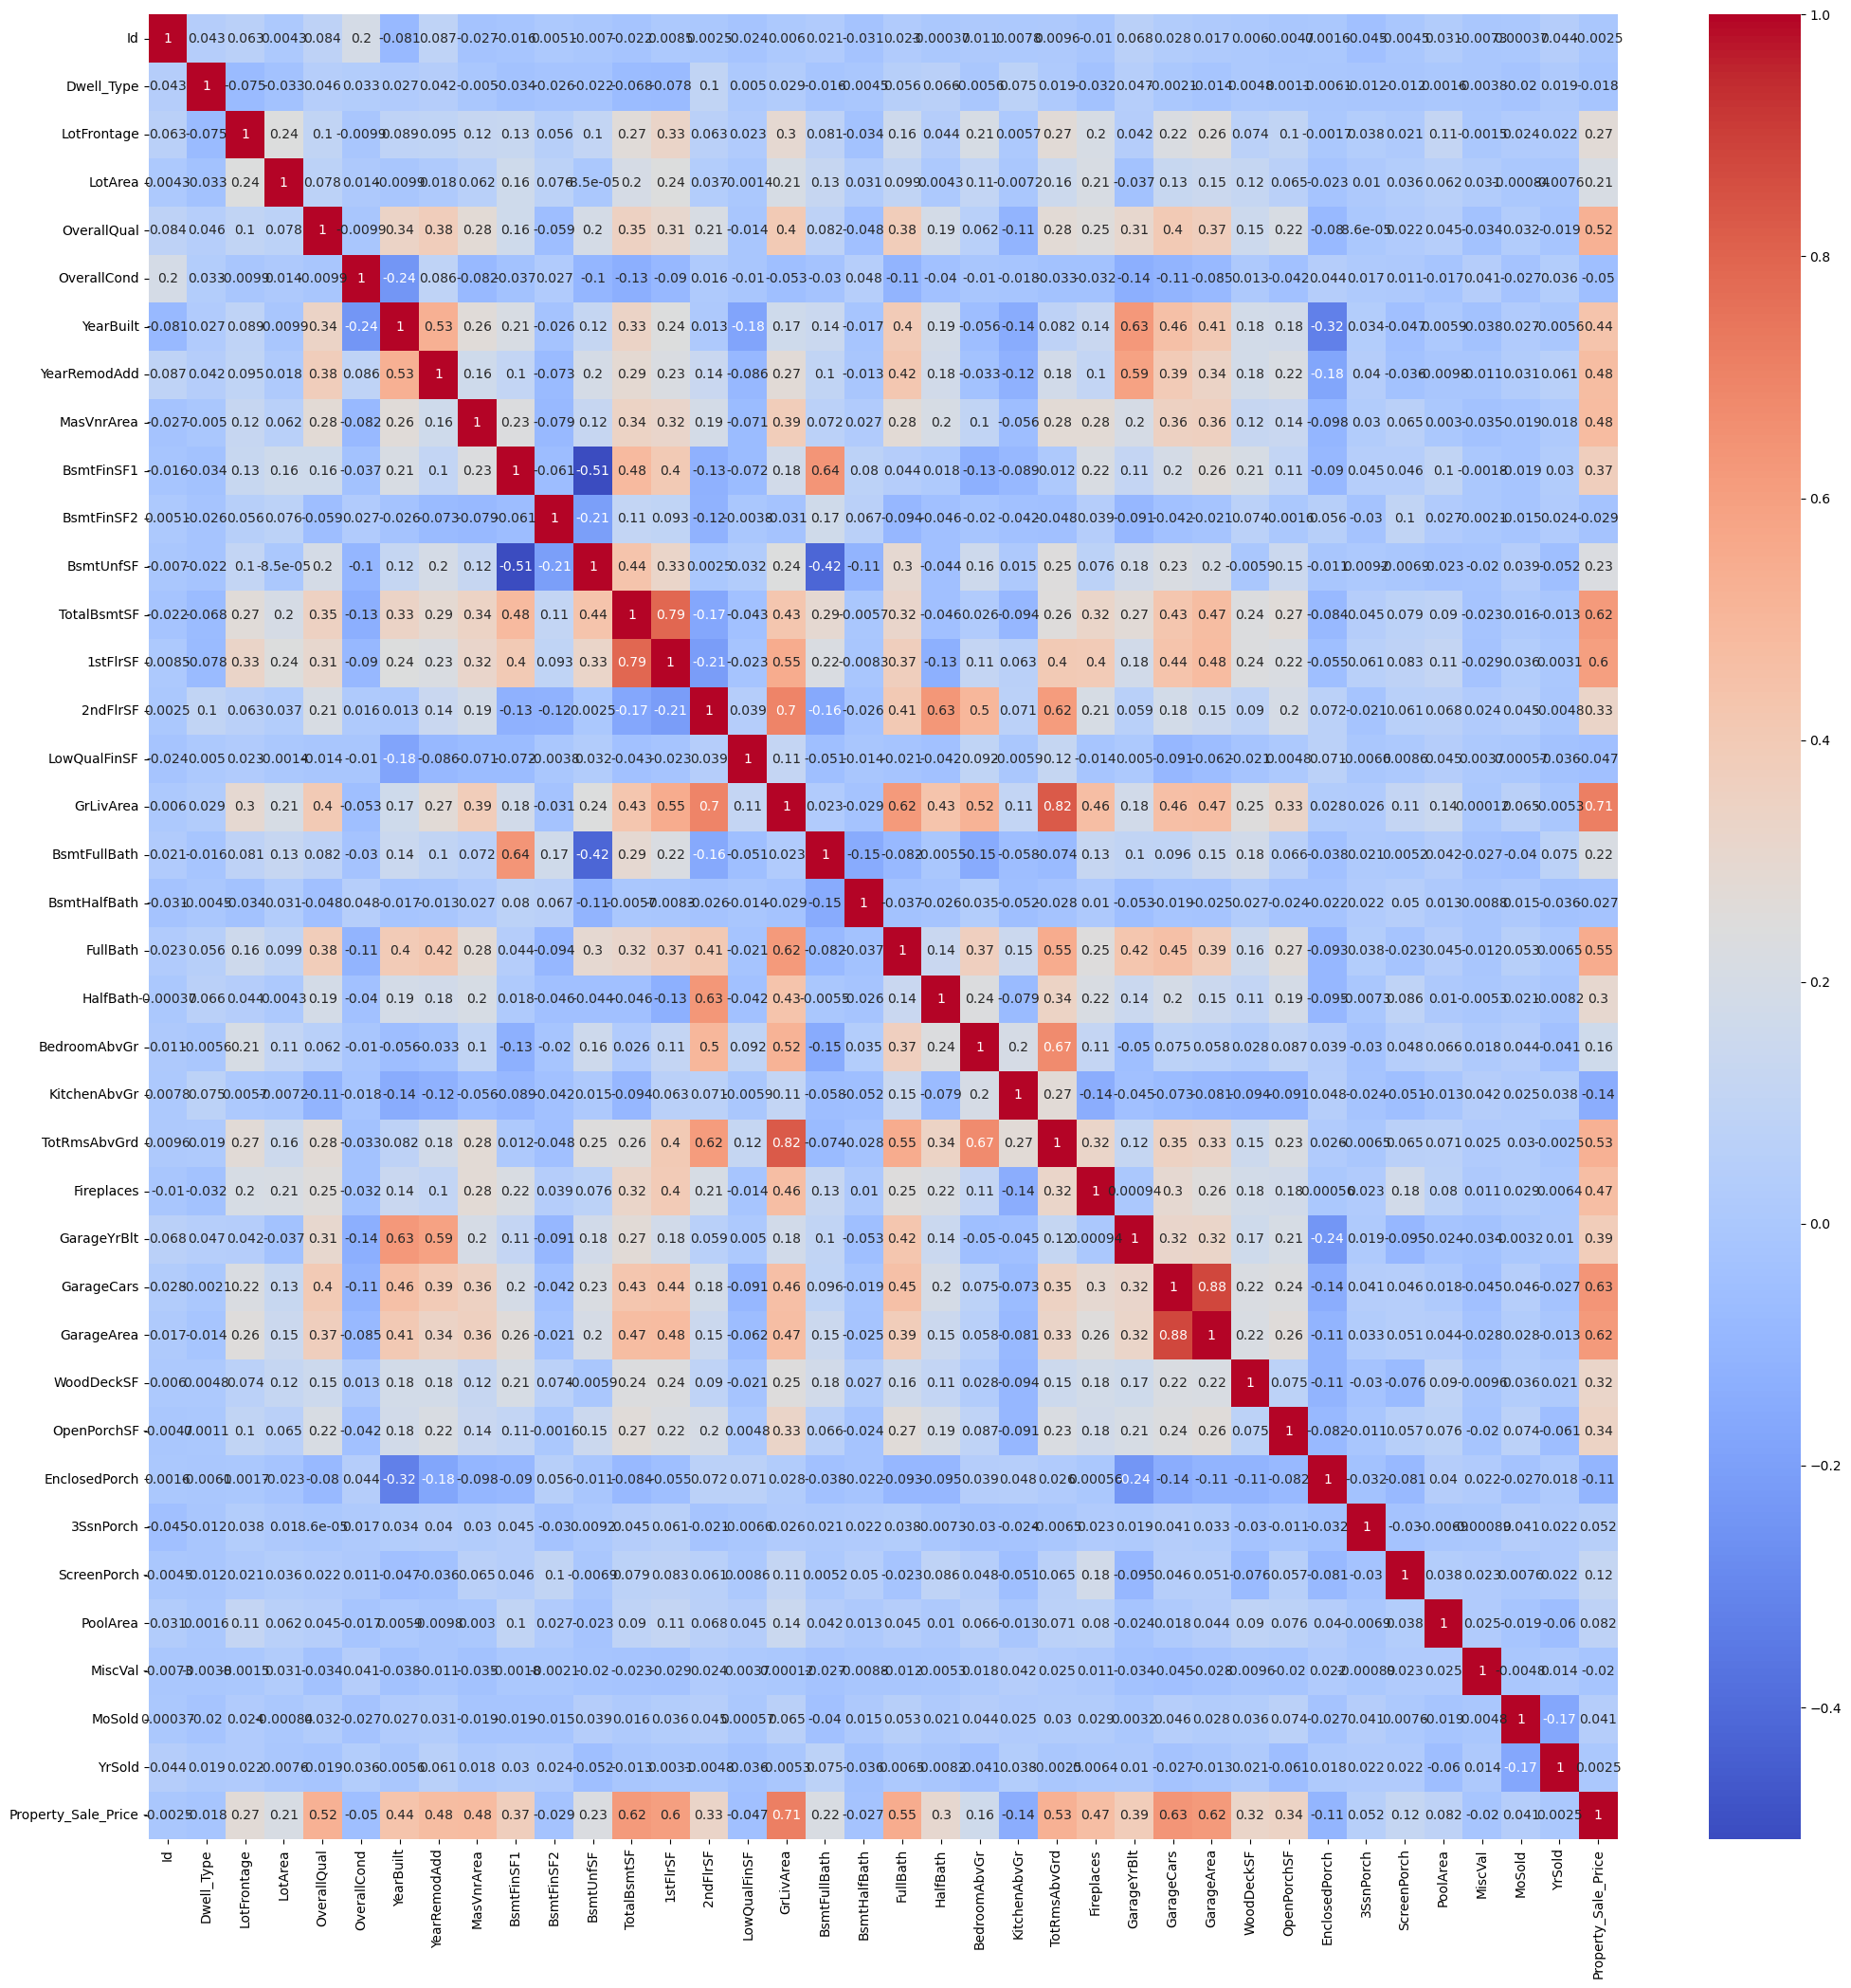

In [58]:
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.show()

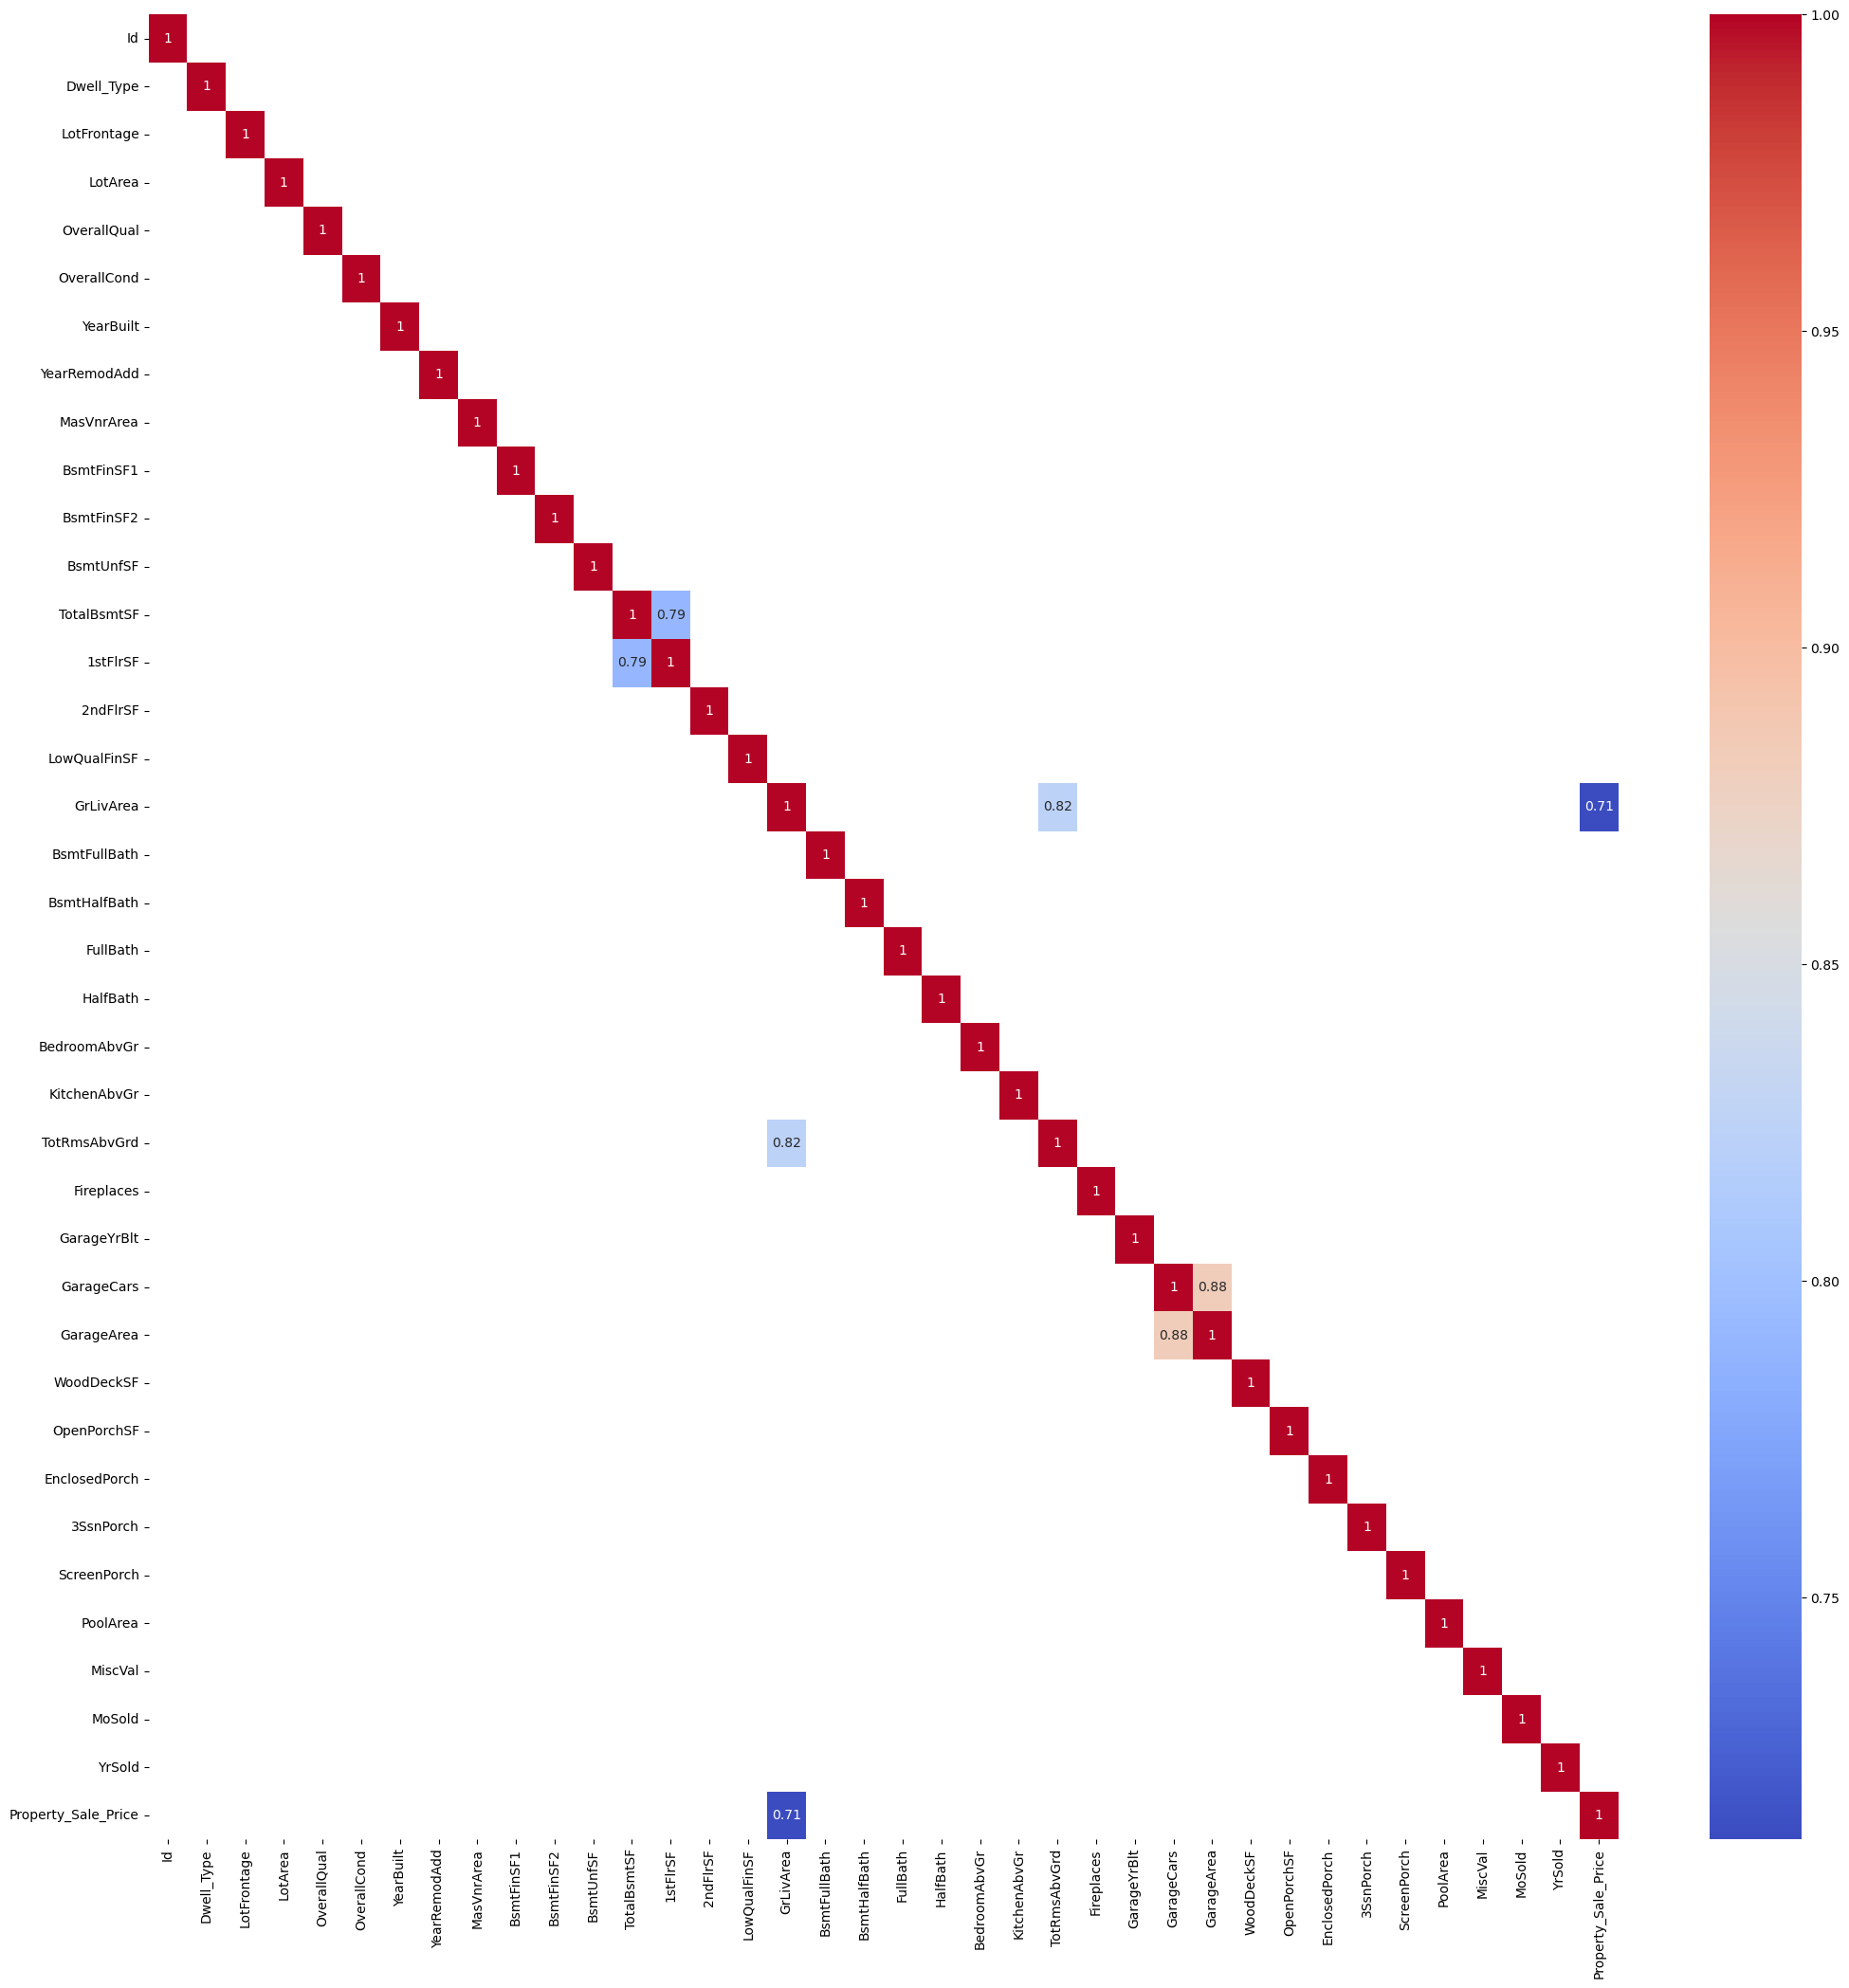

In [59]:
plt.figure(figsize = (25,25))
corr1 = corr[abs(corr)>0.7]
sns.heatmap(corr1, annot = True, cmap='coolwarm')
plt.show()

In [60]:
df1.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF

#### inference
1. 1stFlrSF and TotalBsmtSF have corr = 0.79
2. GarageCars and GarageArea have corr = 0.88
3. TotRmsAbvGrd and GrLivArea have corr = 0.82
<pre>
one of them is enough for the towards prediction of the dependent variable
</pre>

#### Dropping highly corr features

In [61]:
df1.drop(['TotRmsAbvGrd', 'GarageCars', '1stFlrSF'], axis = 1, inplace=True)
df1.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPo

### 5. Outlier Treatment

In [62]:
num_cols = df1.dtypes[df1.dtypes!='object'].index
cat_cols = df1.dtypes[df1.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')
Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical'

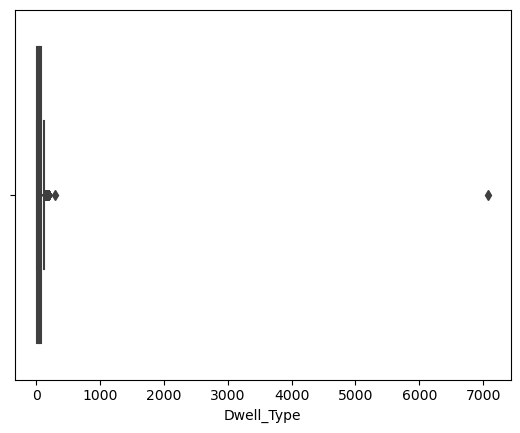

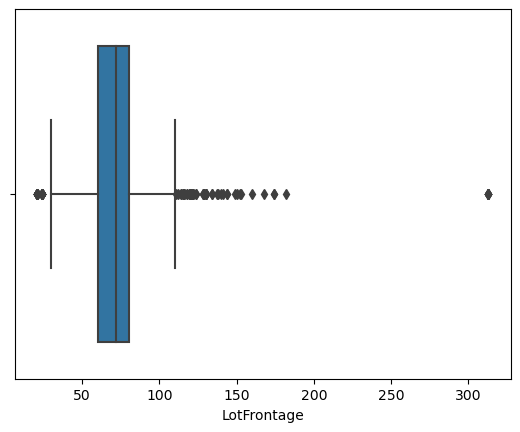

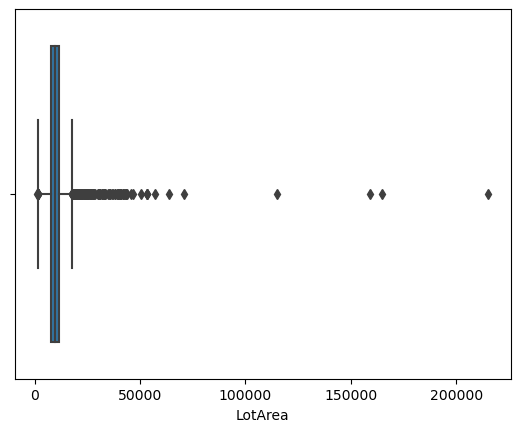

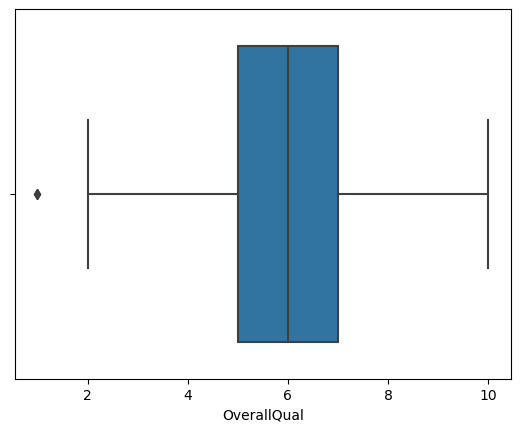

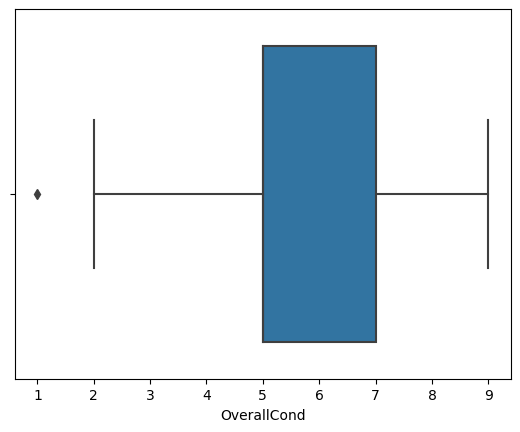

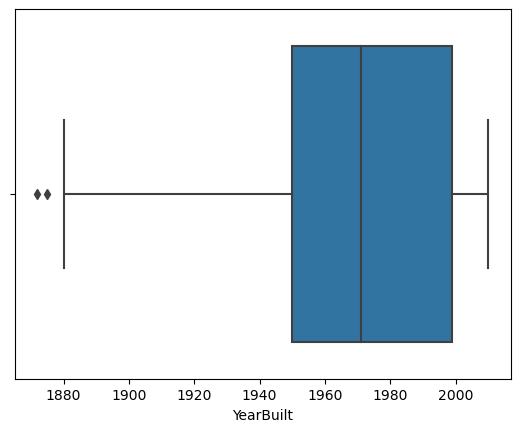

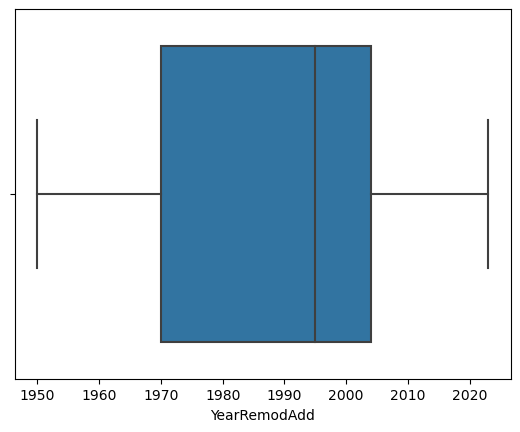

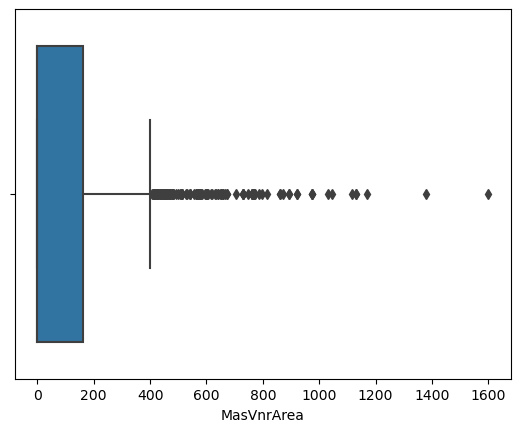

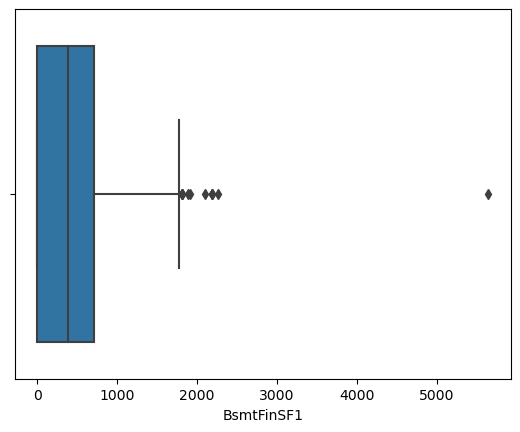

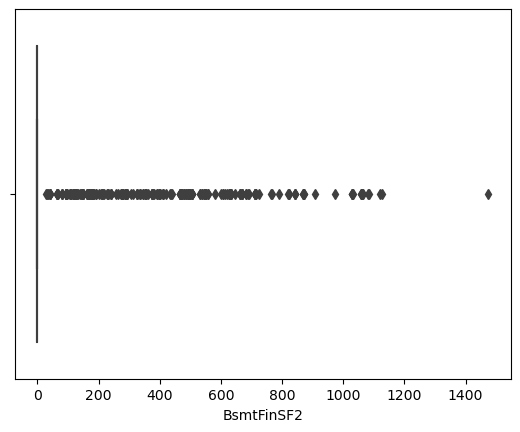

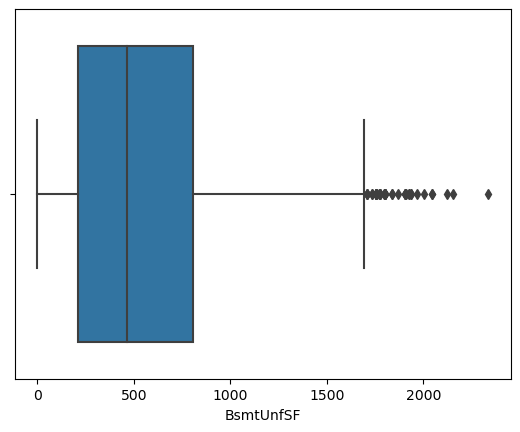

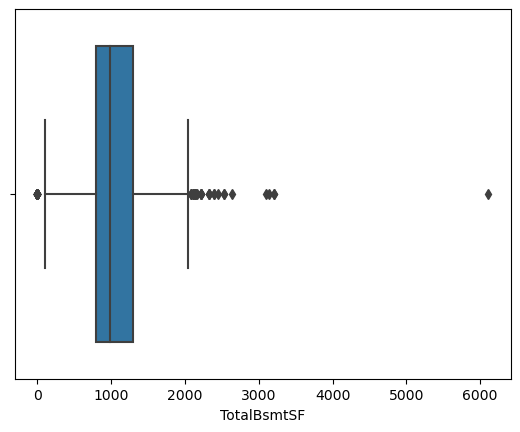

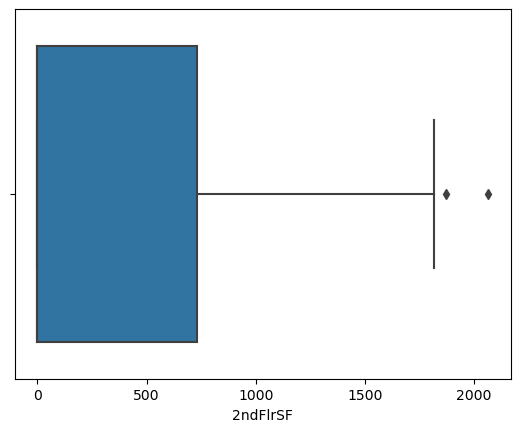

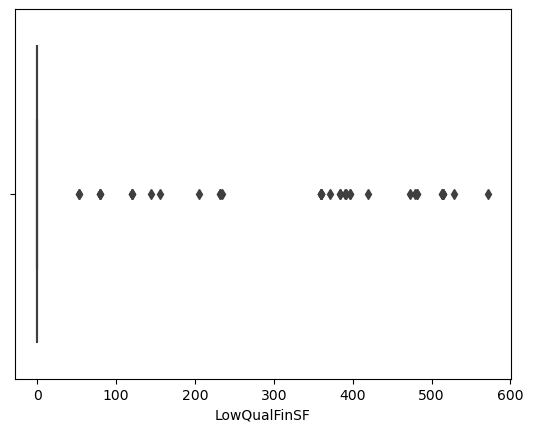

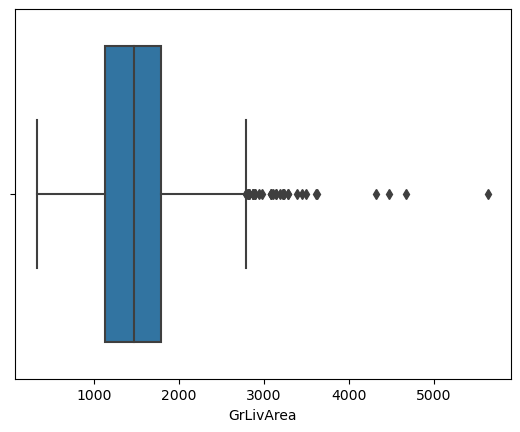

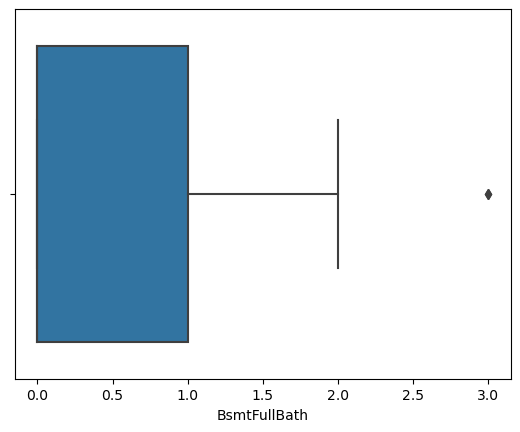

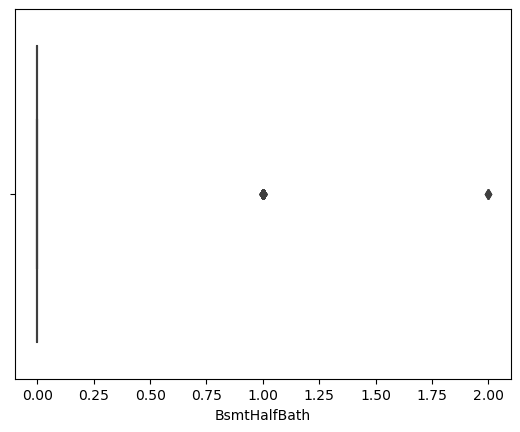

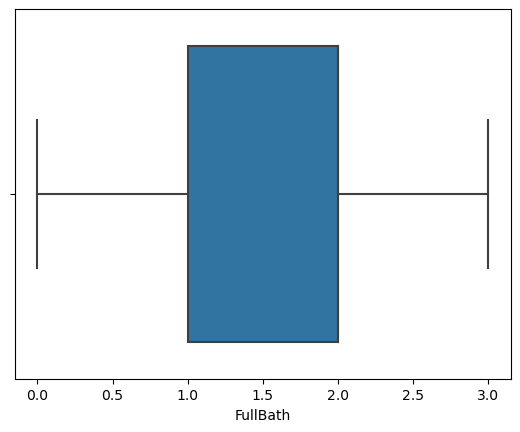

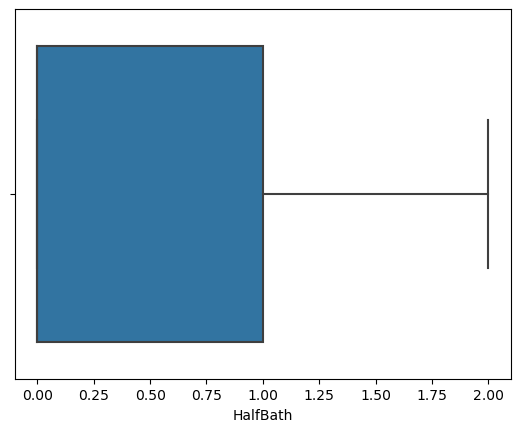

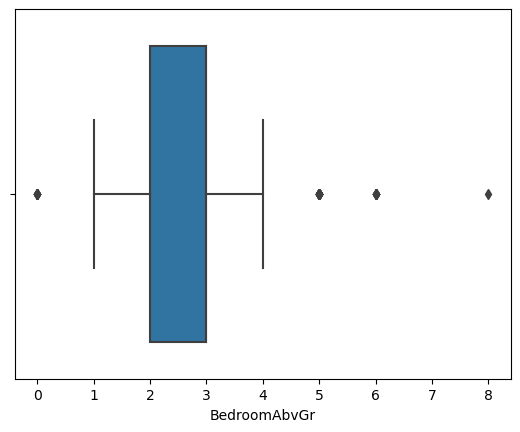

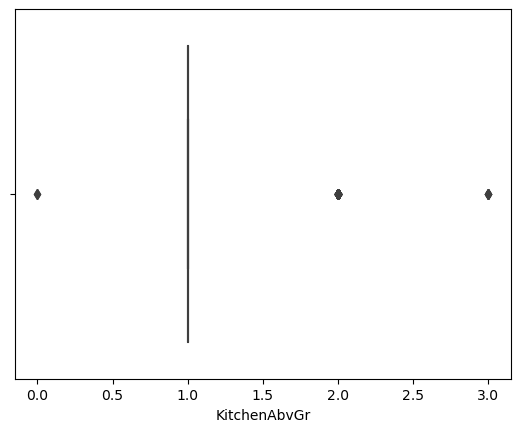

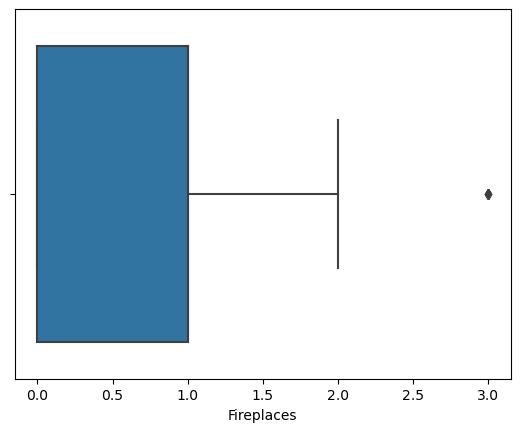

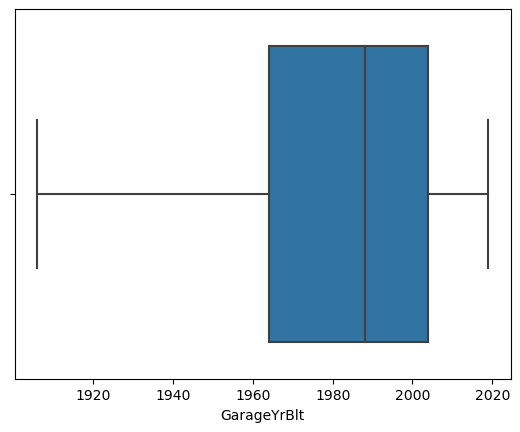

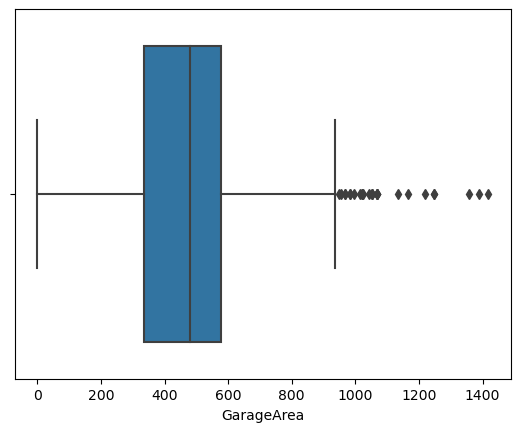

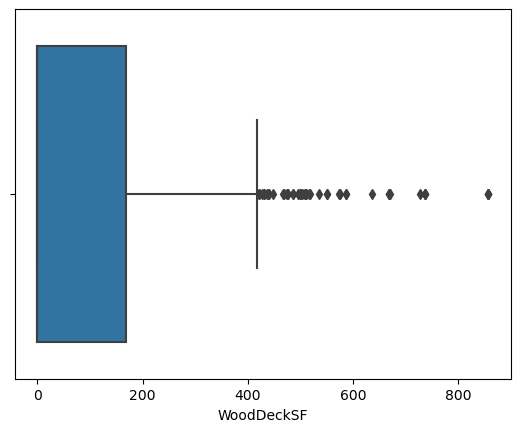

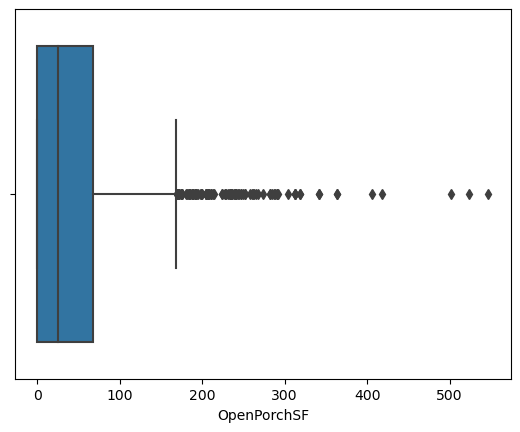

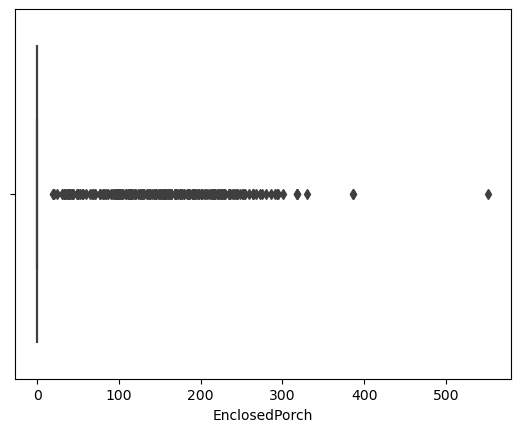

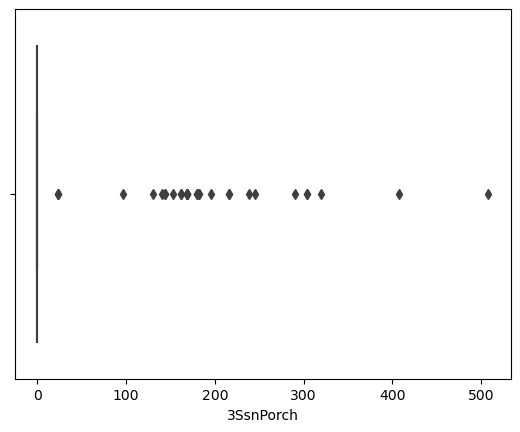

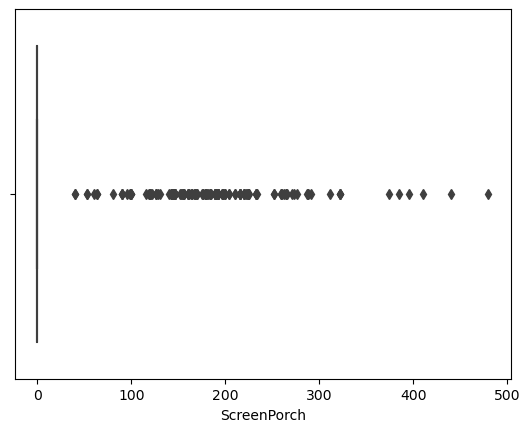

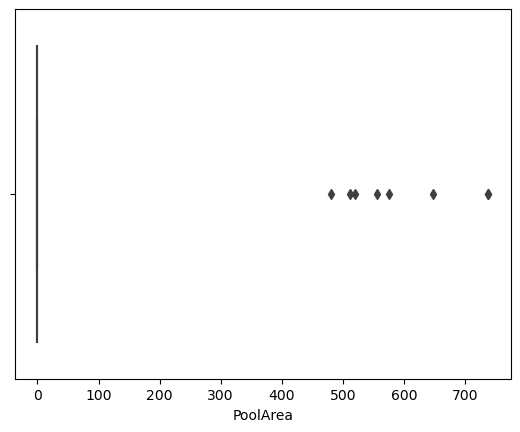

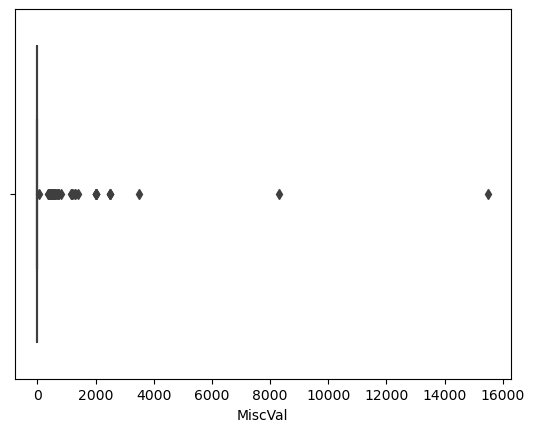

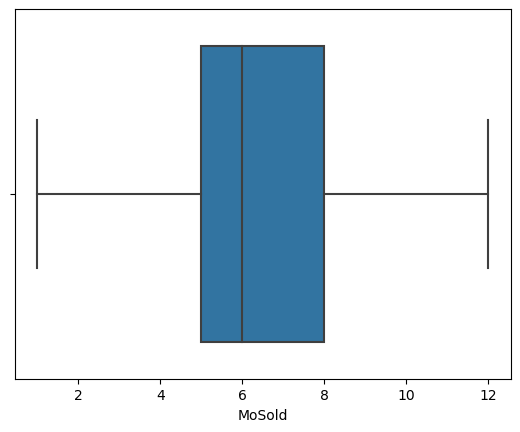

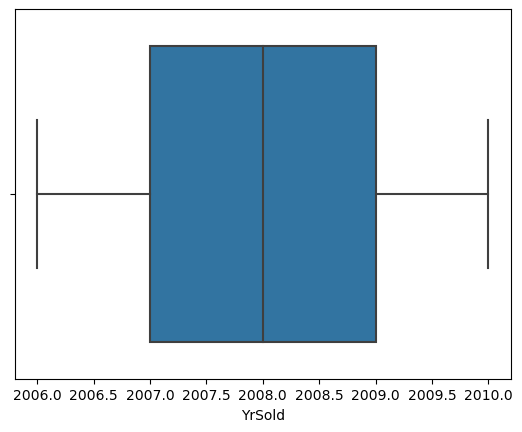

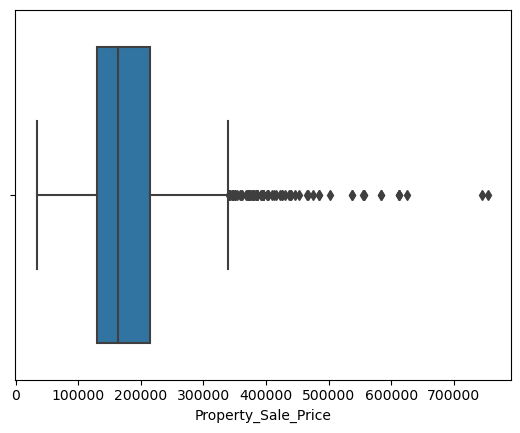

In [63]:
for i in num_cols:
    sns.boxplot(x=df1[i])
    plt.show()

In [64]:
df1.describe(percentiles=[0.01, 0.02, 0.03, 0.05]).T

,count,mean,std,min,1%,2%,3%,5%,50%,max
Dwell_Type,2059.0,60.569694,160.434497,20.0,20.00,20.00,20.00,20.0,50.000000,7080.0
LotFrontage,2059.0,72.052405,25.741854,21.0,21.00,24.00,32.00,36.0,72.056475,313.0
LotArea,2059.0,10731.351627,9241.752913,1300.0,1881.18,2268.00,2645.00,3675.0,9497.000000,215245.0
OverallQual,2059.0,6.238465,1.519218,1.0,3.00,4.00,4.00,4.0,6.000000,10.0
OverallCond,2059.0,5.837300,1.363215,1.0,3.00,4.00,4.00,4.0,5.000000,9.0
YearBuilt,2059.0,1969.382710,30.236792,1872.0,1900.00,1905.16,1910.00,1916.0,1971.000000,2010.0
YearRemodAdd,2059.0,1986.652258,20.405665,1950.0,1950.00,1950.00,1950.00,1950.0,1995.000000,2023.0
MasVnrArea,2059.0,101.585236,179.131049,0.0,0.00,0.00,0.00,0.0,0.000000,1600.0
BsmtFinSF1,2059.0,438.789218,448.736658,0.0,0.00,0.00,0.00,0.0,383.000000,5644.0
BsmtFinSF2,2059.0,49.413307,166.052884,0.0,0.00,0.00,0.00,0.0,0.000000,1474.0


In [65]:
df1.describe(percentiles=[0.90, 0.95, 0.97, 0.98, 0.99]).T

,count,mean,std,min,50%,90%,95%,97%,98%,99%,max
Dwell_Type,2059.0,60.569694,160.434497,20.0,50.000000,120.0,160.0,160.00,190.00,190.00,7080.0
LotFrontage,2059.0,72.052405,25.741854,21.0,72.056475,97.0,107.0,115.00,121.00,140.42,313.0
LotArea,2059.0,10731.351627,9241.752913,1300.0,9497.000000,14778.6,20442.3,26097.60,32395.16,40963.22,215245.0
OverallQual,2059.0,6.238465,1.519218,1.0,6.000000,8.0,9.0,9.00,9.00,9.00,10.0
OverallCond,2059.0,5.837300,1.363215,1.0,5.000000,8.0,9.0,9.00,9.00,9.00,9.0
YearBuilt,2059.0,1969.382710,30.236792,1872.0,1971.000000,2005.0,2007.0,2007.00,2008.00,2009.00,2010.0
YearRemodAdd,2059.0,1986.652258,20.405665,1950.0,1995.000000,2007.0,2008.0,2009.00,2011.84,2017.00,2023.0
MasVnrArea,2059.0,101.585236,179.131049,0.0,0.000000,336.0,448.0,571.52,651.00,778.72,1600.0
BsmtFinSF1,2059.0,438.789218,448.736658,0.0,383.000000,1056.0,1238.8,1352.82,1439.36,1572.42,5644.0
BsmtFinSF2,2059.0,49.413307,166.052884,0.0,0.000000,127.0,465.0,562.98,670.00,852.76,1474.0


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


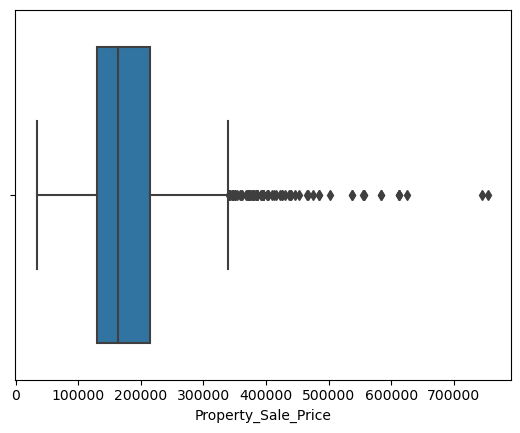

In [66]:
sns.boxplot(df1['Property_Sale_Price'])
plt.show()

In [67]:
print(df1[df1['Property_Sale_Price']>370154.28].shape)
print(df1[df1['Property_Sale_Price']<64500.00].shape)
print(df1[df1['MiscVal']>700].shape)

(62, 72)
(20, 72)
(19, 72)


In [69]:
print(num_cols)

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')


In [70]:
def outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.99)) # iqr
    x = x.clip(lower = x.quantile(0.01))
    return x

In [71]:
df1[num_cols] = df1[num_cols].apply(outlier_treatment)

### 6. encoding categorical columns

In [72]:
print(len(cat_cols))

38


In [73]:
df1.dtypes.value_counts()

object     38
float64    32
int64       2
dtype: int64

In [74]:
df2 = df1.copy()

In [75]:
df1[cat_cols[0]].value_counts()

RL         1601
RM          323
FV          100
RH           21
C (all)      14
Name: Zone_Class, dtype: int64

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
lb = LabelEncoder()

In [79]:
for i in cat_cols:
    df1[i] = lb.fit_transform(df1[i])

In [81]:
df1['Zone_Class'].value_counts()
# RL         1601
# RM          323
# FV          100
# RH           21
# C (all)      14

3    1601
4     323
1     100
2      21
0      14
Name: Zone_Class, dtype: int64

In [82]:
df1.dtypes.value_counts()

int64      40
float64    32
dtype: int64

#### select x and y

In [83]:
df1.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPo

In [84]:
x = df1.drop('Property_Sale_Price', axis = 1) # x = df1.iloc[:, :-1]
y = np.log(df1['Property_Sale_Price'])        # y = df1.iloc[:,-1] ; log bcz the data was not normally distributed
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2059, 71)
(2059,)


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1441, 71)
(618, 71)
(1441,)
(618,)


### Model Building

In [86]:
lr1 = LinearRegression()

In [87]:
lr1.fit(x_train, y_train)

LinearRegression()

In [88]:
print('Training Score:', lr1.score(x_train, y_train)) # training r2 score
print('Test Score:', lr1.score(x_test, y_test))       # testing r2 score

Training Score: 0.8987868248944403
Test Score: 0.874762387904973


In [89]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test, ypred_lr1)

MAE: 0.09629487467002795
MSE: 0.019395811286148295
RMSE: 0.1392688453536838
R2_Score: 0.874762387904973


In [90]:
ypred_lr1_tf = np.exp(ypred_lr1)
print(ypred_lr1_tf[:10])

[654634.28451672 411787.53092478 247217.28464054 167861.14834674
  71083.90891974 340868.65415313 187190.29773326 194334.7788878
 126007.33135958 137204.08368028]


In [91]:
m = lr1.coef_
c = lr1.intercept_
print('Coefficients:\n',m)
print('Intercept:',c)

Coefficients:
 [ 1.06991205e-04 -2.61936711e-02 -2.54595331e-05  1.14661970e-06
  1.97901343e-01 -7.27651197e-03 -5.75366148e-03 -7.01802077e-02
 -9.46047252e-04  1.68018606e-02  7.03899933e-04  3.15296128e-03
 -4.41130853e-02 -1.11869207e-02  8.53951101e-04  8.15305109e-03
  1.29562105e-02  4.97419906e-04  1.22426518e-03 -5.46652880e-04
  1.07787015e-02 -7.09001675e-03  6.72686484e-03  1.12051646e-02
  3.31347976e-05 -2.60121502e-02  1.20846328e-02  1.90036791e-02
 -1.84563511e-02  4.64524980e-03 -7.70791257e-03 -7.87143900e-04
 -2.09516820e-04  7.44791922e-04 -2.39788324e-04 -2.71672934e-04
  3.96492297e-04 -1.87869596e-02 -1.39732270e-02  7.70879403e-02
  9.65910719e-03 -3.67059285e-05 -4.02318589e-04  3.01483830e-04
  1.77899618e-02  1.39060402e-05  2.17425628e-02  2.13274302e-02
  8.14126916e-03 -1.04205717e-01 -3.53693607e-02  2.89783546e-02
  4.21723813e-02 -5.97960882e-03 -3.82226680e-04 -9.56227381e-03
  1.61525730e-04  5.74682627e-03  2.01254212e-02  4.02778664e-03
  9.847229

#### Encode using One-Hot encoder

In [100]:
df2.dtypes.value_counts()

object     38
float64    32
int64       2
dtype: int64

In [101]:
df2_dummies = pd.get_dummies(df2, drop_first=True)
print(df2_dummies.shape)

(2059, 239)


In [102]:
x2 = df2_dummies.drop('Property_Sale_Price', axis = 1) # x2 = df1.iloc[:, :-1]
y2 = np.log(df2_dummies['Property_Sale_Price'])        # y2 = df1.iloc[:,-1] ; log bcz the data was not normally distributed
print(type(x2))
print(type(y2))
print(x2.shape)
print(y2.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2059, 238)
(2059,)


In [103]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size = 0.3, random_state=42)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1441, 238)
(618, 238)
(1441,)
(618,)


#### Model Building

In [104]:
lr2 = LinearRegression()
lr2.fit(x_train2, y_train2)

LinearRegression()

In [105]:
print('Train Score', lr2.score(x_train2, y_train2))
print('Test Score', lr2.score(x_test2, y_test2))

Train Score 0.941296483021858
Test Score 0.889726476307498


In [106]:
ypred_lr2 = lr2.predict(x_test2)
eval_model(y_test2, ypred_lr2)

MAE: 0.0847846016455848
MSE: 0.0170782915740638
RMSE: 0.13068393770492148
R2_Score: 0.889726476307498


In [107]:
ypred_lr2_tf = np.exp(ypred_lr2)
print(ypred_lr2[:10])

[13.35270383 13.00991386 12.47507642 12.10173577 11.18586103 12.7600977
 12.17306264 12.19723292 11.74867321 11.83751679]


### OLS

In [108]:
df1.dtypes.value_counts()

int64      40
float64    32
dtype: int64

In [109]:
import statsmodels.api as sm

In [110]:
x = sm.add_constant(x)
ols_model = sm.OLS(y,x).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.893
Model:                             OLS   Adj. R-squared:                  0.890
Method:                  Least Squares   F-statistic:                     237.8
Date:                 Mon, 16 Jan 2023   Prob (F-statistic):               0.00
Time:                         20:06:24   Log-Likelihood:                 1355.2
No. Observations:                 2059   AIC:                            -2568.
Df Residuals:                     1988   BIC:                            -2169.
Df Model:                           70                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             14.8129      4.512      3.283      0.001       5.964      23.662
Dwell_Type      2.322e-05      0.000      0.170      0.865      -0.000       0.000
Zone_Class        -0.0237      0.005     -4.868      0.000      -0.033      -0.014
LotFrontage        0.0001      0.000      0.767      0.443      -0.000       0.000
LotArea         5.668e-07   5.67e-07      1.000      0.317   -5.45e-07    1.68e-06
Road_Type          0.2312      0.045      5.126      0.000       0.143       0.320
Property_Shape    -0.0072      0.002     -3.257      0.001      -0.012      -0.003
LandContour       -0.0008      0.005     -0.176      0.861      -0.010       0.008
Utilities         -0.0761      0.081     -0.938      0.349      -0.235       0.083
LotConfig         -0.0013      0.002     -0.712      0.476      -0.005       0.002
LandSlope          0.0226      0.012      1.820      0.069      -0.002       0.047
Neighborhood       0.0008      0.001      1.519      0.129      -0.000       0.002
Condition1         0.0072      0.003      2.153      0.031       0.001       0.014
Condition2        -0.0305      0.012     -2.512      0.012      -0.054      -0.007
Dwelling_Type     -0.0079      0.004     -1.764      0.078      -0.017       0.001
HouseStyle         0.0010      0.002      0.478      0.633      -0.003       0.005
OverallQual        0.0105      0.002      4.532      0.000       0.006       0.015
OverallCond        0.0135      0.002      5.789      0.000       0.009       0.018
YearBuilt          0.0003      0.000      1.959      0.050   -3.15e-07       0.001
YearRemodAdd       0.0013      0.000      6.048      0.000       0.001       0.002
RoofStyle         -0.0001      0.004     -0.027      0.978      -0.007       0.007
RoofMatl           0.0118      0.005      2.377      0.018       0.002       0.022
Exterior1st       -0.0061      0.002     -3.510      0.000      -0.009      -0.003
Exterior2nd        0.0060      0.002      3.875      0.000       0.003       0.009
MasVnrType         0.0095      0.005      1.758      0.079      -0.001       0.020
MasVnrArea      2.749e-05   2.22e-05      1.237      0.216   -1.61e-05    7.11e-05
ExterQual         -0.0283      0.006     -4.393      0.000      -0.041      -0.016
ExterCond          0.0066      0.004      1.576      0.115      -0.002       0.015
Foundation         0.0231      0.005      4.271      0.000       0.013       0.034
BsmtQual          -0.0164      0.003     -4.770      0.000      -0.023      -0.010
BsmtCond           0.0042      0.003      1.304      0.192      -0.002       0.011
BsmtExposure      -0.0096      0.003     -3.289      0.001      -0.015      -0.004
BsmtFinType1      -0.0009      0.002     -0.507      0.612      -0.004       0.003
BsmtFinSF1     -8.996e-05    5.5e-05     -1.637      0.102      -0.000    1.78e-05
B

In [111]:
print(ols_model.rsquared)
print(ols_model.rsquared_adj)

0.8933262886321973
0.8895701720347395


#### Excluding features based on OLS model

In [113]:
x3 = df1.drop(['Property_Sale_Price','Dwell_Type','LotFrontage','LotArea',
               'LandContour','Utilities','LotConfig','HouseStyle',
               'RoofStyle','BsmtFinType1','BsmtFinType2',
               'BsmtFinSF2','Heating','GarageQual','3SsnPorch',
               'MiscVal','MoSold'],axis=1)

y3 = np.log(df1['Property_Sale_Price'])
print(x3.shape)
print(y3.shape)

(2059, 55)
(2059,)


In [114]:
x3 = sm.add_constant(x3)
ols_model3 = sm.OLS(y3,x3).fit()
ols_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.893
Model:                             OLS   Adj. R-squared:                  0.890
Method:                  Least Squares   F-statistic:                     308.6
Date:                 Mon, 16 Jan 2023   Prob (F-statistic):               0.00
Time:                         20:06:24   Log-Likelihood:                 1348.8
No. Observations:                 2059   AIC:                            -2588.
Df Residuals:                     2004   BIC:                            -2278.
Df Model:                           54                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.3560      4.416      3.477      0.001       6.695      24.017
Zone_Class        -0.0251      0.005     -5.231      0.000      -0.035      -0.016
Road_Type          0.2342      0.044      5.319      0.000       0.148       0.321
Property_Shape    -0.0078      0.002     -3.661      0.000      -0.012      -0.004
LandSlope          0.0252      0.011      2.205      0.028       0.003       0.048
Neighborhood       0.0007      0.001      1.436      0.151      -0.000       0.002
Condition1         0.0076      0.003      2.303      0.021       0.001       0.014
Condition2        -0.0321      0.012     -2.659      0.008      -0.056      -0.008
Dwelling_Type     -0.0086      0.003     -3.083      0.002      -0.014      -0.003
OverallQual        0.0104      0.002      4.507      0.000       0.006       0.015
OverallCond        0.0136      0.002      5.857      0.000       0.009       0.018
YearBuilt          0.0003      0.000      1.908      0.057   -8.66e-06       0.001
YearRemodAdd       0.0014      0.000      6.263      0.000       0.001       0.002
RoofMatl           0.0121      0.005      2.475      0.013       0.003       0.022
Exterior1st       -0.0058      0.002     -3.400      0.001      -0.009      -0.002
Exterior2nd        0.0058      0.002      3.794      0.000       0.003       0.009
MasVnrType         0.0096      0.005      1.794      0.073      -0.001       0.020
MasVnrArea      3.012e-05   2.18e-05      1.385      0.166   -1.25e-05    7.28e-05
ExterQual         -0.0284      0.006     -4.472      0.000      -0.041      -0.016
ExterCond          0.0061      0.004      1.470      0.142      -0.002       0.014
Foundation         0.0227      0.005      4.267      0.000       0.012       0.033
BsmtQual          -0.0168      0.003     -4.959      0.000      -0.023      -0.010
BsmtCond           0.0045      0.003      1.410      0.159      -0.002       0.011
BsmtExposure      -0.0106      0.003     -3.788      0.000      -0.016      -0.005
BsmtFinSF1      2.818e-05   1.83e-05      1.543      0.123   -7.64e-06     6.4e-05
BsmtUnfSF      -3.396e-05   1.88e-05     -1.805      0.071   -7.09e-05    2.93e-06
TotalBsmtSF        0.0002   2.18e-05      7.707      0.000       0.000       0.000
HeatingQC         -0.0111      0.002     -5.436      0.000      -0.015      -0.007
CentralAir         0.0873      0.014      6.442      0.000       0.061       0.114
Electrical         0.0053      0.003      1.693      0.091      -0.001       0.011
2ndFlrSF        -2.36e-05   1.67e-05     -1.411      0.158   -5.64e-05    9.19e-06
LowQualFinSF      -0.0003   7.47e-05     -4.051      0.000      -0.000      -0.000
GrLivArea          0.0003   1.74e-05     16.196      0.000       0.000       0.000
BsmtFullBath       0.0253      0.008      3.101      0.002       0.009       0.041
B

In [115]:
print(ols_model.rsquared_adj)
print(ols_model3.rsquared_adj)

0.8895701720347395
0.8897684547811536
